# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings

import warnings

In [2]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
df = pd.read_parquet('../Datasets and Dictionary/trip_records/2023-1.parquet')
df.head()
# df.info()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [6]:
df.shape

(3041714, 19)

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('../Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()
# print(file_list)

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        month_df = pd.read_parquet(file_path)
        

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        # Split the Date and Time in Separate Column to loop through dates and then in hour
        month_df['pickup_date'] = month_df['tpep_pickup_datetime'].dt.date
        month_df['pickup_hour'] = month_df['tpep_pickup_datetime'].dt.hour

        for (date,hour), hour_df in month_df.groupby(['pickup_date', 'pickup_hour']):    
        # for date in month_df['pickup_date']:
            # Iterate through each hour of the selected date
            if not hour_df.empty:
                # Sample 5% of the hourly data randomly
                sample_hour = hour_df.sample(frac=0.05, random_state=42)           

                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample_hour])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True) # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [8]:
# Store the df in csv/parquet
# df.to_parquet
target_size = 300000

if len(df) > target_size:
    # Sample the combined dataframe to desired size
    df = df.sample(n=target_size, random_state=42).reset_index(drop=True)

df.to_parquet('NYC_Taxi_sampled.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [9]:
# Load the new data file
df = pd.read_parquet('NYC_Taxi_sampled.parquet')

In [10]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-07-27 01:13:22   2023-07-27 01:29:34              1.0   
1         2  2023-12-07 23:24:45   2023-12-07 23:47:36              1.0   
2         2  2023-01-06 11:43:31   2023-01-06 11:55:45              2.0   
3         2  2023-11-29 19:16:41   2023-11-29 19:26:35              1.0   
4         1  2023-06-08 13:22:43   2023-06-08 13:36:14              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           6.43         1.0                  N           263           243   
1           3.39         1.0                  N           231           230   
2           1.65         1.0                  N           236           141   
3           1.12         1.0                  N           163           229   
4           2.80         1.0                  N            65            13   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        5.38           0.0   
2             2  ...      0.5        0.00           0.0   
3             1  ...      0.5        2.00           0.0   
4             2  ...      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         33.20                   2.5          0.0   
1                    1.0         32.28                   2.5          0.0   
2                    1.0         16.80                   2.5          NaN   
3                    1.0         19.20                   2.5          0.0   
4                    1.0         20.30                   2.5          0.0   

   pickup_date  pickup_hour airport_fee  
0   2023-07-27            1         NaN  
1   2023-12-07           23         NaN  
2   2023-01-06           11         0.0  
3   2023-11-29           19         NaN  
4   2023-06-08           13         NaN  

[5 rows x 22 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289788 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289788 non-null  float64       
 6   store_and_fwd_flag     289788 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  floa

In [12]:
df.shape

(300000, 22)

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed

In [13]:
# pick_date and pickup_hour column doesnot required any more, dropping that column
df.drop(columns=['pickup_date', 'pickup_hour'], inplace=True)

In [15]:
df.extra.value_counts()

extra
0.00     119893
2.50      73961
1.00      57483
5.00      21146
3.50      16798
7.50       2589
6.00       2429
9.25       1051
4.25       1029
1.75        524
6.75        393
3.75        370
2.75        366
8.75        331
10.25       270
7.75        238
11.75       216
1.25        202
6.25        150
2.25        129
9.75         96
10.00        89
7.25         82
11.25        71
8.50         56
3.00         10
5.25          4
2.00          3
3.25          2
0.50          2
12.50         2
4.75          2
3.05          1
7.00          1
14.25         1
0.01          1
4.50          1
6.80          1
4.05          1
3.20          1
1.26          1
2.45          1
1.50          1
0.70          1
0.03          1
Name: count, dtype: int64

In [16]:
# Reset_index
df.reset_index(drop=True, inplace=True)

In [17]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-07-27 01:13:22   2023-07-27 01:29:34              1.0   
1         2  2023-12-07 23:24:45   2023-12-07 23:47:36              1.0   
2         2  2023-01-06 11:43:31   2023-01-06 11:55:45              2.0   
3         2  2023-11-29 19:16:41   2023-11-29 19:26:35              1.0   
4         1  2023-06-08 13:22:43   2023-06-08 13:36:14              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           6.43         1.0                  N           263           243   
1           3.39         1.0                  N           231           230   
2           1.65         1.0                  N           236           141   
3           1.12         1.0                  N           163           229   
4           2.80         1.0                  N            65            13   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2         28.2    1.0      0.5        0.00           0.0   
1             1         21.9    1.0      0.5        5.38           0.0   
2             2         12.8    0.0      0.5        0.00           0.0   
3             1         10.7    2.5      0.5        2.00           0.0   
4             2         16.3    2.5      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         33.20                   2.5          0.0   
1                    1.0         32.28                   2.5          0.0   
2                    1.0         16.80                   2.5          NaN   
3                    1.0         19.20                   2.5          0.0   
4                    1.0         20.30                   2.5          0.0   

   airport_fee  
0          NaN  
1          NaN  
2          0.0  
3          NaN  
4          NaN

In [18]:
df.shape

(300000, 20)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns

In [19]:
df.Airport_fee.value_counts(dropna=False)

Airport_fee
0.00    242678
NaN      33712
1.75     19289
1.25      4321
Name: count, dtype: int64

In [20]:
df.airport_fee.value_counts(dropna=False)

airport_fee
NaN     276500
0.00     21394
1.25      2106
Name: count, dtype: int64

In [21]:
df['Airport_fee'] = df['Airport_fee'].fillna(df['airport_fee'])

In [22]:
df.Airport_fee.value_counts(dropna=False)

Airport_fee
0.00    264072
1.75     19289
NaN      10212
1.25      6427
Name: count, dtype: int64

In [23]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-07-27 01:13:22   2023-07-27 01:29:34              1.0   
1         2  2023-12-07 23:24:45   2023-12-07 23:47:36              1.0   
2         2  2023-01-06 11:43:31   2023-01-06 11:55:45              2.0   
3         2  2023-11-29 19:16:41   2023-11-29 19:26:35              1.0   
4         1  2023-06-08 13:22:43   2023-06-08 13:36:14              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           6.43         1.0                  N           263           243   
1           3.39         1.0                  N           231           230   
2           1.65         1.0                  N           236           141   
3           1.12         1.0                  N           163           229   
4           2.80         1.0                  N            65            13   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2         28.2    1.0      0.5        0.00           0.0   
1             1         21.9    1.0      0.5        5.38           0.0   
2             2         12.8    0.0      0.5        0.00           0.0   
3             1         10.7    2.5      0.5        2.00           0.0   
4             2         16.3    2.5      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         33.20                   2.5          0.0   
1                    1.0         32.28                   2.5          0.0   
2                    1.0         16.80                   2.5          0.0   
3                    1.0         19.20                   2.5          0.0   
4                    1.0         20.30                   2.5          0.0   

   airport_fee  
0          NaN  
1          NaN  
2          0.0  
3          NaN  
4          NaN

In [24]:
df.drop(columns=['airport_fee'], inplace=True)

In [25]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-07-27 01:13:22   2023-07-27 01:29:34              1.0   
1         2  2023-12-07 23:24:45   2023-12-07 23:47:36              1.0   
2         2  2023-01-06 11:43:31   2023-01-06 11:55:45              2.0   
3         2  2023-11-29 19:16:41   2023-11-29 19:26:35              1.0   
4         1  2023-06-08 13:22:43   2023-06-08 13:36:14              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           6.43         1.0                  N           263           243   
1           3.39         1.0                  N           231           230   
2           1.65         1.0                  N           236           141   
3           1.12         1.0                  N           163           229   
4           2.80         1.0                  N            65            13   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2         28.2    1.0      0.5        0.00           0.0   
1             1         21.9    1.0      0.5        5.38           0.0   
2             2         12.8    0.0      0.5        0.00           0.0   
3             1         10.7    2.5      0.5        2.00           0.0   
4             2         16.3    2.5      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
0                    1.0         33.20                   2.5          0.0  
1                    1.0         32.28                   2.5          0.0  
2                    1.0         16.80                   2.5          0.0  
3                    1.0         19.20                   2.5          0.0  
4                    1.0         20.30                   2.5          0.0

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [26]:
# check where values of fare amount are negative
df.fare_amount.describe()

count    300000.000000
mean         19.846109
std          18.196230
min           0.000000
25%           9.300000
50%          13.500000
75%          21.900000
max         519.600000
Name: fare_amount, dtype: float64

In [ ]:
# Min value is 0, show no negative value

Did you notice something different in the `RatecodeID` column for above records?

In [27]:
# Analyse RatecodeID for the negative fare amounts
df.RatecodeID.describe()

count    289788.000000
mean          1.644544
std           7.457958
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          99.000000
Name: RatecodeID, dtype: float64

In [28]:
df.RatecodeID.value_counts()

RatecodeID
1.0     273515
2.0      11424
99.0      1686
5.0       1614
3.0        976
4.0        572
6.0          1
Name: count, dtype: int64

In [ ]:
# Find which columns have negative values

In [29]:
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  300000.000000                      300000                      300000   
mean        1.733887  2023-07-02 15:46:51.062683  2023-07-02 16:04:18.929156   
min         1.000000         2023-01-01 00:06:59         2023-01-01 00:09:35   
25%         1.000000  2023-04-02 13:25:31.750000  2023-04-02 13:40:49.250000   
50%         2.000000         2023-06-27 12:09:01         2023-06-27 12:29:57   
75%         2.000000  2023-10-06 16:23:41.750000  2023-10-06 16:48:26.750000   
max         6.000000         2023-12-31 23:57:12         2024-01-01 12:29:40   
std         0.447174                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    289788.000000  300000.000000  289788.000000  300000.000000   
mean          1.369729       3.588323       1.644544     165.315550   
min           0.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.790000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           8.000000   35482.690000      99.000000     265.000000   
std           0.891493      65.933088       7.457958      63.957505   

        DOLocationID   payment_type    fare_amount          extra  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean      164.270263       1.164623      19.846109       1.587761   
min         1.000000       0.000000       0.000000       0.000000   
25%       114.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000     519.600000      14.250000   
std        69.798480       0.509500      18.196230       1.832958   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  300000.000000  300000.000000  300000.000000          300000.000000   
mean        0.495331       3.545656       0.601374               0.999059   
min        -0.500000       0.000000       0.000000              -1.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.850000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         0.800000     150.000000     143.000000               1.000000   
std         0.048235       4.029248       2.211486               0.029142   

        total_amount  congestion_surcharge    Airport_fee  
count  300000.000000         289788.000000  289788.000000  
mean       28.914124              2.305893       0.144207  
min        -4.000000             -2.500000       0.000000  
25%        15.960000              2.500000       0.000000  
50%        21.000000              2.500000       0.000000  
75%        30.870000              2.500000       0.000000  
max       530.060000              2.500000       1.750000  
std        22.775897              0.669185       0.466590

In [30]:
df.mta_tax.describe()

count    300000.000000
mean          0.495331
std           0.048235
min          -0.500000
25%           0.500000
50%           0.500000
75%           0.500000
max           0.800000
Name: mta_tax, dtype: float64

In [31]:
df.mta_tax.value_counts()

mta_tax
 0.50    297196
 0.00      2789
-0.50         6
 0.80         5
 0.05         4
Name: count, dtype: int64

In [32]:
df.improvement_surcharge.describe()

count    300000.000000
mean          0.999059
std           0.029142
min          -1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: improvement_surcharge, dtype: float64

In [33]:
df.improvement_surcharge.value_counts()

improvement_surcharge
 1.0    299666
 0.3       196
 0.0       131
-1.0         7
Name: count, dtype: int64

In [34]:
df.total_amount.describe()

count    300000.000000
mean         28.914124
std          22.775897
min          -4.000000
25%          15.960000
50%          21.000000
75%          30.870000
max         530.060000
Name: total_amount, dtype: float64

In [35]:
df.congestion_surcharge.describe()

count    289788.000000
mean          2.305893
std           0.669185
min          -2.500000
25%           2.500000
50%           2.500000
75%           2.500000
max           2.500000
Name: congestion_surcharge, dtype: float64

In [36]:
df.Airport_fee.describe()

count    289788.000000
mean          0.144207
std           0.466590
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.750000
Name: Airport_fee, dtype: float64

In [ ]:
# fix these negative values

In [37]:
# 0.50 USD mta tax is automatically triggered, negative value is mistakenly added, it should be 0.50
# converting -0.50 to 0.50
df['mta_tax'] = np.where(df.mta_tax < 0, 0.50, df.mta_tax)

In [38]:
df.mta_tax.describe()

count    300000.000000
mean          0.495351
std           0.048029
min           0.000000
25%           0.500000
50%           0.500000
75%           0.500000
max           0.800000
Name: mta_tax, dtype: float64

In [39]:
df.improvement_surcharge.value_counts()

improvement_surcharge
 1.0    299666
 0.3       196
 0.0       131
-1.0         7
Name: count, dtype: int64

In [40]:
df[df.improvement_surcharge < 0]
# It seems it cause negative value in other coulmn, going to drop all negative value rows

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
14408          2  2023-06-13 12:09:53   2023-06-13 12:48:21              1.0   
62104          2  2023-04-24 12:48:38   2023-04-24 12:48:44              1.0   
222209         2  2023-12-05 15:54:13   2023-12-05 15:54:37              1.0   
264540         2  2023-05-17 13:27:33   2023-05-17 14:25:24              1.0   
294038         2  2023-08-25 21:14:13   2023-08-25 21:19:14              1.0   
296450         2  2023-03-08 15:51:33   2023-03-08 15:52:12              1.0   
299915         2  2023-05-14 23:47:22   2023-05-14 23:57:43              6.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
14408            5.25         1.0                  N            50   
62104            0.00         5.0                  N           140   
222209           0.00         1.0                  N           132   
264540           5.44         1.0                  N           144   
294038           0.54         2.0                  N           238   
296450           0.00         1.0                  N           231   
299915           3.66         1.0                  N           170   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
14408            226             2          0.0    0.0      0.5         0.0   
62104              7             2          0.0    0.0      0.0         0.0   
222209           132             2          0.0    0.0      0.5         0.0   
264540           238             2          0.0    0.0      0.5         0.0   
294038           238             2          0.0    0.0      0.5         0.0   
296450           231             2          0.0    0.0      0.5         0.0   
299915           263             2          0.0    0.0      0.5         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
14408            0.0                   -1.0          -4.0   
62104            0.0                   -1.0          -3.5   
222209           0.0                   -1.0          -1.5   
264540           0.0                   -1.0          -4.0   
294038           0.0                   -1.0          -4.0   
296450           0.0                   -1.0          -1.5   
299915           0.0                   -1.0          -4.0   

        congestion_surcharge  Airport_fee  
14408                   -2.5          0.0  
62104                   -2.5          0.0  
222209                   0.0          0.0  
264540                  -2.5          0.0  
294038                  -2.5          0.0  
296450                   0.0          0.0  
299915                  -2.5          0.0

In [41]:
df = df[df.improvement_surcharge >= 0]

In [42]:
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  299993.000000                      299993                      299993   
mean        1.733880  2023-07-02 15:47:16.638188  2023-07-02 16:04:44.506545   
min         1.000000         2023-01-01 00:06:59         2023-01-01 00:09:35   
25%         1.000000         2023-04-02 13:25:13         2023-04-02 13:40:17   
50%         2.000000         2023-06-27 12:12:00         2023-06-27 12:32:06   
75%         2.000000         2023-10-06 16:25:26         2023-10-06 16:48:32   
max         6.000000         2023-12-31 23:57:12         2024-01-01 12:29:40   
std         0.447177                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    289781.000000  299993.000000  289781.000000  299993.000000   
mean          1.369721       3.588357       1.644542     165.315724   
min           0.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.790000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           8.000000   35482.690000      99.000000     265.000000   
std           0.891461      65.933856       7.458044      63.957597   

        DOLocationID   payment_type    fare_amount          extra  \
count  299993.000000  299993.000000  299993.000000  299993.000000   
mean      164.269646       1.164604      19.846572       1.587798   
min         1.000000       0.000000       0.000000       0.000000   
25%       114.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000     519.600000      14.250000   
std        69.797989       0.509490      18.196190       1.832963   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  299993.000000  299993.000000  299993.000000          299993.000000   
mean        0.495352       3.545739       0.601388               0.999106   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.850000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         0.800000     150.000000     143.000000               1.000000   
std         0.048021       4.029258       2.211510               0.027496   

        total_amount  congestion_surcharge    Airport_fee  
count  299993.000000         289781.000000  289781.000000  
mean       28.914873              2.305991       0.144211  
min         0.000000              0.000000       0.000000  
25%        15.960000              2.500000       0.000000  
50%        21.000000              2.500000       0.000000  
75%        30.870000              2.500000       0.000000  
max       530.060000              2.500000       1.750000  
std        22.775634              0.668867       0.466595

In [ ]:
# Removed all negative value rows

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [43]:
# Find the proportion of missing values in each column

df[df.isna().any(axis=1)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
48             1  2023-11-07 09:24:09   2023-11-07 09:36:21              NaN   
58             2  2023-03-19 09:21:22   2023-03-19 09:35:36              NaN   
91             2  2023-04-20 20:03:14   2023-04-20 20:18:03              NaN   
104            1  2023-11-28 20:23:32   2023-11-28 20:29:17              NaN   
149            2  2023-06-24 02:21:35   2023-06-24 02:30:01              NaN   
...          ...                  ...                   ...              ...   
299876         1  2023-10-19 18:57:33   2023-10-19 19:06:19              NaN   
299919         1  2023-11-29 07:55:57   2023-11-29 08:39:25              NaN   
299957         1  2023-09-19 13:56:22   2023-09-19 14:16:04              NaN   
299970         2  2023-10-14 10:31:21   2023-10-14 10:49:50              NaN   
299996         1  2023-09-07 12:15:22   2023-09-07 12:44:44              NaN   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
48               2.10         NaN               None           236   
58               1.15         NaN               None           142   
91               2.16         NaN               None            24   
104              0.00         NaN               None           100   
149              2.26         NaN               None           237   
...               ...         ...                ...           ...   
299876           1.10         NaN               None           237   
299919           0.00         NaN               None           158   
299957           0.00         NaN               None           239   
299970           2.73         NaN               None           170   
299996           0.00         NaN               None           113   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
48               162             0        13.50    0.0      0.5        3.50   
58               237             0        12.21    0.0      0.5        3.00   
91                74             0        14.99    0.0      0.5        0.00   
104              164             0         8.08    0.0      0.5        0.00   
149              164             0        13.20    0.0      0.5        0.69   
...              ...           ...          ...    ...      ...         ...   
299876           142             0         8.60    2.5      0.5        3.02   
299919           236             0        34.20    0.0      0.5        0.00   
299957           237             0        17.00    0.0      0.5        3.15   
299970           249             0        18.53    0.0      0.5        0.00   
299996            87             0        23.27    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
48               0.0                    1.0         21.00   
58               0.0                    1.0         19.21   
91               0.0                    1.0         16.49   
104              0.0                    1.0         12.08   
149              0.0                    1.0         17.89   
...              ...                    ...           ...   
299876           0.0                    1.0         18.12   
299919           0.0                    1.0         38.20   
299957           0.0                    1.0         26.15   
299970           0.0                    1.0         22.53   
299996           0.0                    1.0         27.27   

        congestion_surcharge  Airport_fee  
48                       NaN          NaN  
58                       NaN          NaN  
91                       NaN          NaN  
104                      NaN          NaN  
149                      NaN          NaN  
...                      ...          ...  
299876                   NaN          NaN  
299919                   NaN          NaN  
299957                   NaN          NaN  
299970                   NaN          NaN  
299996                   NaN          Na

In [44]:
for column in df.columns:
    value = df[column].isna().sum()
    print(f"{column}: {value}")

VendorID: 0
tpep_pickup_datetime: 0
tpep_dropoff_datetime: 0
passenger_count: 10212
trip_distance: 0
RatecodeID: 10212
store_and_fwd_flag: 10212
PULocationID: 0
DOLocationID: 0
payment_type: 0
fare_amount: 0
extra: 0
mta_tax: 0
tip_amount: 0
tolls_amount: 0
improvement_surcharge: 0
total_amount: 0
congestion_surcharge: 10212
Airport_fee: 10212


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [47]:
# Display the rows with null values
df[df.passenger_count.isna()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
48             1  2023-11-07 09:24:09   2023-11-07 09:36:21              NaN   
58             2  2023-03-19 09:21:22   2023-03-19 09:35:36              NaN   
91             2  2023-04-20 20:03:14   2023-04-20 20:18:03              NaN   
104            1  2023-11-28 20:23:32   2023-11-28 20:29:17              NaN   
149            2  2023-06-24 02:21:35   2023-06-24 02:30:01              NaN   
...          ...                  ...                   ...              ...   
299876         1  2023-10-19 18:57:33   2023-10-19 19:06:19              NaN   
299919         1  2023-11-29 07:55:57   2023-11-29 08:39:25              NaN   
299957         1  2023-09-19 13:56:22   2023-09-19 14:16:04              NaN   
299970         2  2023-10-14 10:31:21   2023-10-14 10:49:50              NaN   
299996         1  2023-09-07 12:15:22   2023-09-07 12:44:44              NaN   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
48               2.10         NaN               None           236   
58               1.15         NaN               None           142   
91               2.16         NaN               None            24   
104              0.00         NaN               None           100   
149              2.26         NaN               None           237   
...               ...         ...                ...           ...   
299876           1.10         NaN               None           237   
299919           0.00         NaN               None           158   
299957           0.00         NaN               None           239   
299970           2.73         NaN               None           170   
299996           0.00         NaN               None           113   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
48               162             0        13.50    0.0      0.5        3.50   
58               237             0        12.21    0.0      0.5        3.00   
91                74             0        14.99    0.0      0.5        0.00   
104              164             0         8.08    0.0      0.5        0.00   
149              164             0        13.20    0.0      0.5        0.69   
...              ...           ...          ...    ...      ...         ...   
299876           142             0         8.60    2.5      0.5        3.02   
299919           236             0        34.20    0.0      0.5        0.00   
299957           237             0        17.00    0.0      0.5        3.15   
299970           249             0        18.53    0.0      0.5        0.00   
299996            87             0        23.27    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
48               0.0                    1.0         21.00   
58               0.0                    1.0         19.21   
91               0.0                    1.0         16.49   
104              0.0                    1.0         12.08   
149              0.0                    1.0         17.89   
...              ...                    ...           ...   
299876           0.0                    1.0         18.12   
299919           0.0                    1.0         38.20   
299957           0.0                    1.0         26.15   
299970           0.0                    1.0         22.53   
299996           0.0                    1.0         27.27   

        congestion_surcharge  Airport_fee  
48                       NaN          NaN  
58                       NaN          NaN  
91                       NaN          NaN  
104                      NaN          NaN  
149                      NaN          NaN  
...                      ...          ...  
299876                   NaN          NaN  
299919                   NaN          NaN  
299957                   NaN          NaN  
299970                   NaN          NaN  
299996                   NaN          Na

In [ ]:
# Impute NaN values in 'passenger_count'

In [48]:
df.passenger_count.mode()[0]

1.0

In [49]:
# Categorical data, hence using mode to fill missing value
df.loc[:,'passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].mode()[0])

In [50]:
df.passenger_count.isna().sum()

0

Did you find zeroes in passenger_count? Handle these.

In [51]:
df.passenger_count.value_counts()

passenger_count
1.0    228028
2.0     44112
3.0     10941
4.0      6049
0.0      4595
5.0      3755
6.0      2509
8.0         3
7.0         1
Name: count, dtype: int64

In [52]:
# Categorical data, hence using mode to fill missing value
df.loc[:, 'passenger_count'] = np.where(df.passenger_count == 0, df.passenger_count.mode(), df.passenger_count)

In [53]:
df.passenger_count.value_counts()

passenger_count
1.0    232623
2.0     44112
3.0     10941
4.0      6049
5.0      3755
6.0      2509
8.0         3
7.0         1
Name: count, dtype: int64

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'

In [54]:
df.RatecodeID.isna().sum()

10212

In [55]:
df.RatecodeID.value_counts(dropna=False)

RatecodeID
1.0     273510
2.0      11423
NaN      10212
99.0      1686
5.0       1613
3.0        976
4.0        572
6.0          1
Name: count, dtype: int64

In [56]:
df.RatecodeID.mode()[0]

1.0

In [57]:
# Categorical data, hence using mode to fill missing value
df.loc[:, 'RatecodeID'] = df.RatecodeID.fillna(df.RatecodeID.mode()[0])

In [58]:
df.RatecodeID.isna().sum()

0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge

In [59]:
df.congestion_surcharge.isna().sum()

10212

In [60]:
df.congestion_surcharge.value_counts(dropna=False)

congestion_surcharge
2.5    267293
0.0     22488
NaN     10212
Name: count, dtype: int64

In [61]:
# Categorical data, hence using mode to fill missing value
df.loc[:, 'congestion_surcharge'] = df.congestion_surcharge.fillna(df.congestion_surcharge.mode()[0])

In [62]:
df.congestion_surcharge.isna().sum()

0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [63]:
# Handle any remaining missing values
df[df.isna().any(axis=1)]


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
48             1  2023-11-07 09:24:09   2023-11-07 09:36:21              1.0   
58             2  2023-03-19 09:21:22   2023-03-19 09:35:36              1.0   
91             2  2023-04-20 20:03:14   2023-04-20 20:18:03              1.0   
104            1  2023-11-28 20:23:32   2023-11-28 20:29:17              1.0   
149            2  2023-06-24 02:21:35   2023-06-24 02:30:01              1.0   
...          ...                  ...                   ...              ...   
299876         1  2023-10-19 18:57:33   2023-10-19 19:06:19              1.0   
299919         1  2023-11-29 07:55:57   2023-11-29 08:39:25              1.0   
299957         1  2023-09-19 13:56:22   2023-09-19 14:16:04              1.0   
299970         2  2023-10-14 10:31:21   2023-10-14 10:49:50              1.0   
299996         1  2023-09-07 12:15:22   2023-09-07 12:44:44              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
48               2.10         1.0               None           236   
58               1.15         1.0               None           142   
91               2.16         1.0               None            24   
104              0.00         1.0               None           100   
149              2.26         1.0               None           237   
...               ...         ...                ...           ...   
299876           1.10         1.0               None           237   
299919           0.00         1.0               None           158   
299957           0.00         1.0               None           239   
299970           2.73         1.0               None           170   
299996           0.00         1.0               None           113   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
48               162             0        13.50    0.0      0.5        3.50   
58               237             0        12.21    0.0      0.5        3.00   
91                74             0        14.99    0.0      0.5        0.00   
104              164             0         8.08    0.0      0.5        0.00   
149              164             0        13.20    0.0      0.5        0.69   
...              ...           ...          ...    ...      ...         ...   
299876           142             0         8.60    2.5      0.5        3.02   
299919           236             0        34.20    0.0      0.5        0.00   
299957           237             0        17.00    0.0      0.5        3.15   
299970           249             0        18.53    0.0      0.5        0.00   
299996            87             0        23.27    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
48               0.0                    1.0         21.00   
58               0.0                    1.0         19.21   
91               0.0                    1.0         16.49   
104              0.0                    1.0         12.08   
149              0.0                    1.0         17.89   
...              ...                    ...           ...   
299876           0.0                    1.0         18.12   
299919           0.0                    1.0         38.20   
299957           0.0                    1.0         26.15   
299970           0.0                    1.0         22.53   
299996           0.0                    1.0         27.27   

        congestion_surcharge  Airport_fee  
48                       2.5          NaN  
58                       2.5          NaN  
91                       2.5          NaN  
104                      2.5          NaN  
149                      2.5          NaN  
...                      ...          ...  
299876                   2.5          NaN  
299919                   2.5          NaN  
299957                   2.5          NaN  
299970                   2.5          NaN  
299996                   2.5          Na

In [64]:
for column in df.columns:
    value = df[column].isna().sum()
    print(f"{column}: {value}")

VendorID: 0
tpep_pickup_datetime: 0
tpep_dropoff_datetime: 0
passenger_count: 0
trip_distance: 0
RatecodeID: 0
store_and_fwd_flag: 10212
PULocationID: 0
DOLocationID: 0
payment_type: 0
fare_amount: 0
extra: 0
mta_tax: 0
tip_amount: 0
tolls_amount: 0
improvement_surcharge: 0
total_amount: 0
congestion_surcharge: 0
Airport_fee: 10212


In [65]:
df.Airport_fee.value_counts(dropna=False)

Airport_fee
0.00    264065
1.75     19289
NaN      10212
1.25      6427
Name: count, dtype: int64

In [66]:
df.loc[:, 'Airport_fee'] = df.Airport_fee.fillna(df.Airport_fee.mode()[0])

In [67]:
df.Airport_fee.isna().sum()

0

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [68]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  299993.000000                      299993                      299993   
mean        1.733880  2023-07-02 15:47:16.638188  2023-07-02 16:04:44.506545   
min         1.000000         2023-01-01 00:06:59         2023-01-01 00:09:35   
25%         1.000000         2023-04-02 13:25:13         2023-04-02 13:40:17   
50%         2.000000         2023-06-27 12:12:00         2023-06-27 12:32:06   
75%         2.000000         2023-10-06 16:25:26         2023-10-06 16:48:32   
max         6.000000         2023-12-31 23:57:12         2024-01-01 12:29:40   
std         0.447177                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    299993.000000  299993.000000  299993.000000  299993.000000   
mean          1.372452       3.588357       1.622601     165.315724   
min           1.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.790000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           8.000000   35482.690000      99.000000     265.000000   
std           0.863512      65.933856       7.330938      63.957597   

        DOLocationID   payment_type    fare_amount          extra  \
count  299993.000000  299993.000000  299993.000000  299993.000000   
mean      164.269646       1.164604      19.846572       1.587798   
min         1.000000       0.000000       0.000000       0.000000   
25%       114.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000     519.600000      14.250000   
std        69.797989       0.509490      18.196190       1.832963   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  299993.000000  299993.000000  299993.000000          299993.000000   
mean        0.495352       3.545739       0.601388               0.999106   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.850000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         0.800000     150.000000     143.000000               1.000000   
std         0.048021       4.029258       2.211510               0.027496   

        total_amount  congestion_surcharge    Airport_fee  
count  299993.000000         299993.000000  299993.000000  
mean       28.914873              2.312596       0.139302  
min         0.000000              0.000000       0.000000  
25%        15.960000              2.500000       0.000000  
50%        21.000000              2.500000       0.000000  
75%        30.870000              2.500000       0.000000  
max       530.060000              2.500000       1.750000  
std        22.775634              0.658325       0.459330

In [69]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-07-27 01:13:22   2023-07-27 01:29:34              1.0   
1         2  2023-12-07 23:24:45   2023-12-07 23:47:36              1.0   
2         2  2023-01-06 11:43:31   2023-01-06 11:55:45              2.0   
3         2  2023-11-29 19:16:41   2023-11-29 19:26:35              1.0   
4         1  2023-06-08 13:22:43   2023-06-08 13:36:14              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           6.43         1.0                  N           263           243   
1           3.39         1.0                  N           231           230   
2           1.65         1.0                  N           236           141   
3           1.12         1.0                  N           163           229   
4           2.80         1.0                  N            65            13   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2         28.2    1.0      0.5        0.00           0.0   
1             1         21.9    1.0      0.5        5.38           0.0   
2             2         12.8    0.0      0.5        0.00           0.0   
3             1         10.7    2.5      0.5        2.00           0.0   
4             2         16.3    2.5      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
0                    1.0         33.20                   2.5          0.0  
1                    1.0         32.28                   2.5          0.0  
2                    1.0         16.80                   2.5          0.0  
3                    1.0         19.20                   2.5          0.0  
4                    1.0         20.30                   2.5          0.0

<Axes: xlabel='VendorID', ylabel='count'>

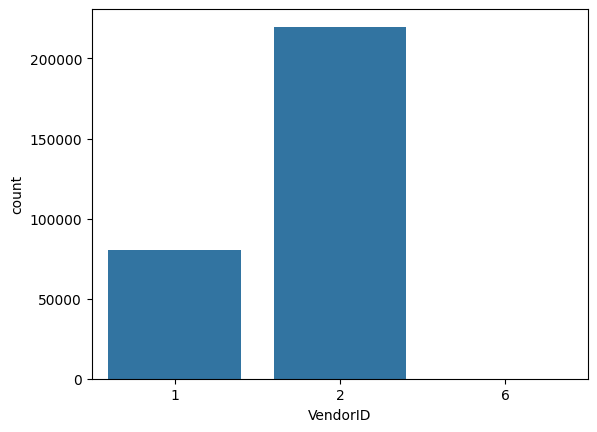

In [70]:
sns.countplot(x='VendorID', data=df)

<Axes: xlabel='passenger_count', ylabel='count'>

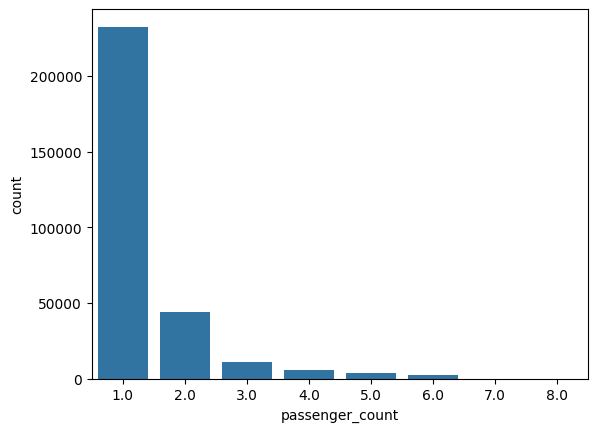

In [71]:
sns.countplot(x='passenger_count', data=df)

In [72]:
sns.boxplot(x=df.trip_distance)

<Axes: xlabel='trip_distance'>

In [73]:
df[df.trip_distance > 5000]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
98430          2  2023-12-10 01:11:00   2023-12-10 01:25:00              1.0   
246410         2  2023-06-26 13:45:44   2023-06-26 13:51:12              2.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
98430        35482.69         1.0               None           224   
246410        6262.99         1.0                  N            75   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
98430             33             0        25.91    0.0      0.5        4.49   
246410           238             1         7.90    0.0      0.5        1.88   

        tolls_amount  improvement_surcharge  total_amount  \
98430            0.0                    1.0         34.40   
246410           0.0                    1.0         11.28   

        congestion_surcharge  Airport_fee  
98430                    2.5          0.0  
246410                   0.0          0.0

<Axes: xlabel='payment_type', ylabel='count'>

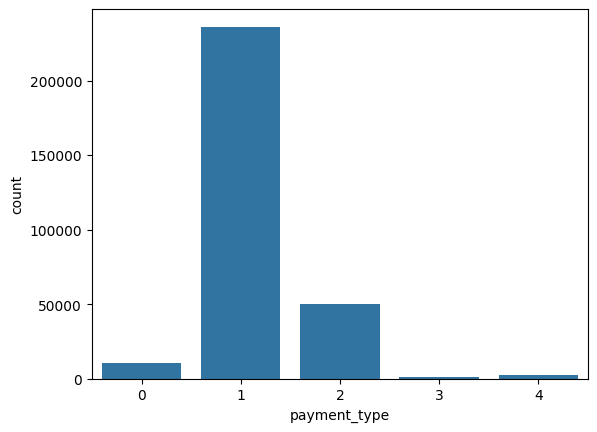

In [81]:
sns.countplot(x='payment_type', data=df)

In [82]:
df.passenger_count.value_counts(dropna=False)

passenger_count
1.0    232623
2.0     44112
3.0     10941
4.0      6049
5.0      3755
6.0      2509
8.0         3
7.0         1
Name: count, dtype: int64

<Axes: xlabel='tip_amount'>

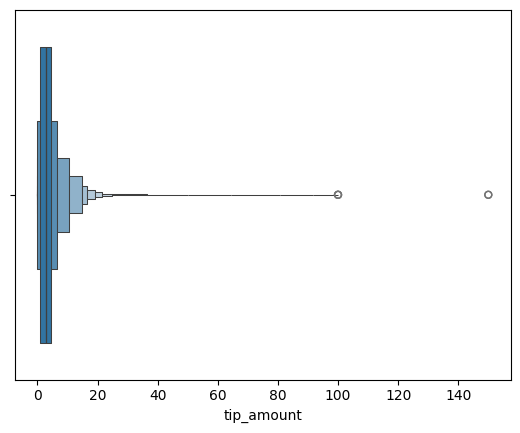

In [83]:
sns.boxenplot(x=df.tip_amount)

In [86]:
df[df.tip_amount > 100]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
71494          1  2023-05-04 15:23:02   2023-05-04 15:23:28              1.0   
212472         1  2023-09-09 01:04:43   2023-09-09 01:28:40              3.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
71494             0.0         1.0                  N           265   
212472            4.6         1.0                  N            79   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
71494            265             1          3.0    0.0      0.5       150.0   
212472            80             1         26.1    3.5      0.5       150.0   

        tolls_amount  improvement_surcharge  total_amount  \
71494            0.0                    1.0         154.5   
212472           0.0                    1.0         181.1   

        congestion_surcharge  Airport_fee  
71494                    0.0          0.0  
212472                   2.5          0.0

In [74]:
sns.countplot(x='RatecodeID', data=df)

<Axes: xlabel='RatecodeID', ylabel='count'>

In [75]:
df.store_and_fwd_flag.value_counts(dropna=False)

store_and_fwd_flag
N       288003
None     10212
Y         1778
Name: count, dtype: int64

In [76]:
df.payment_type.value_counts(dropna=False)

payment_type
1    236069
2     50050
0     10212
4      2218
3      1444
Name: count, dtype: int64

<Axes: xlabel='fare_amount'>

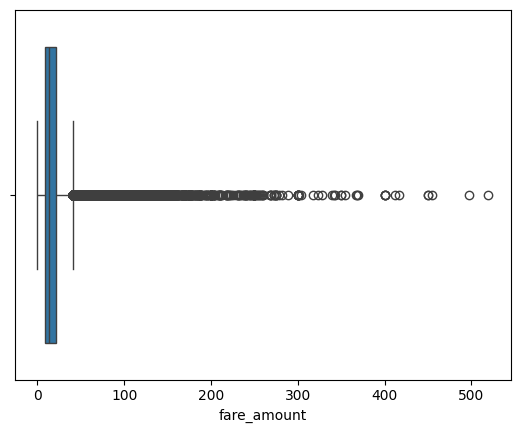

In [77]:
sns.boxplot(x=df.fare_amount)

<Axes: xlabel='total_amount'>

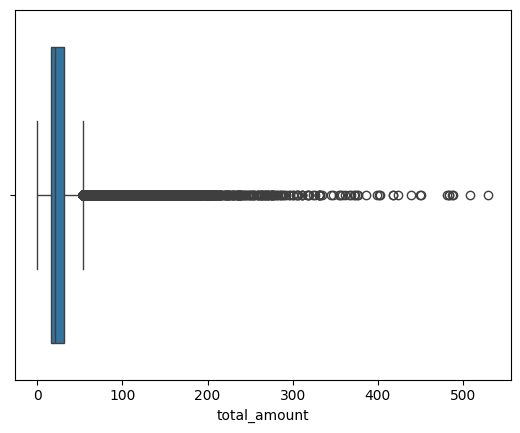

In [78]:
sns.boxplot(x=df.total_amount)

In [79]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-07-27 01:13:22   2023-07-27 01:29:34              1.0   
1         2  2023-12-07 23:24:45   2023-12-07 23:47:36              1.0   
2         2  2023-01-06 11:43:31   2023-01-06 11:55:45              2.0   
3         2  2023-11-29 19:16:41   2023-11-29 19:26:35              1.0   
4         1  2023-06-08 13:22:43   2023-06-08 13:36:14              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           6.43         1.0                  N           263           243   
1           3.39         1.0                  N           231           230   
2           1.65         1.0                  N           236           141   
3           1.12         1.0                  N           163           229   
4           2.80         1.0                  N            65            13   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2         28.2    1.0      0.5        0.00           0.0   
1             1         21.9    1.0      0.5        5.38           0.0   
2             2         12.8    0.0      0.5        0.00           0.0   
3             1         10.7    2.5      0.5        2.00           0.0   
4             2         16.3    2.5      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
0                    1.0         33.20                   2.5          0.0  
1                    1.0         32.28                   2.5          0.0  
2                    1.0         16.80                   2.5          0.0  
3                    1.0         19.20                   2.5          0.0  
4                    1.0         20.30                   2.5          0.0

In [80]:
categorical_column = ['mta_tax', 'improvement_surcharge', 'Airport_fee']

for column in categorical_column:
    value = df[column].value_counts(dropna=False)
    print(f"{column}: {value}")

mta_tax: mta_tax
0.50    297196
0.00      2788
0.80         5
0.05         4
Name: count, dtype: int64
improvement_surcharge: improvement_surcharge
1.0    299666
0.3       196
0.0       131
Name: count, dtype: int64
Airport_fee: Airport_fee
0.00    274277
1.75     19289
1.25      6427
Name: count, dtype: int64


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [87]:
# remove passenger_count > 6
df = df[df.passenger_count <= 6]

In [88]:
# Continue with outlier handling
df[df.trip_distance > 5000]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
98430          2  2023-12-10 01:11:00   2023-12-10 01:25:00              1.0   
246410         2  2023-06-26 13:45:44   2023-06-26 13:51:12              2.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
98430        35482.69         1.0               None           224   
246410        6262.99         1.0                  N            75   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
98430             33             0        25.91    0.0      0.5        4.49   
246410           238             1         7.90    0.0      0.5        1.88   

        tolls_amount  improvement_surcharge  total_amount  \
98430            0.0                    1.0         34.40   
246410           0.0                    1.0         11.28   

        congestion_surcharge  Airport_fee  
98430                    2.5          0.0  
246410                   0.0          0.0

In [89]:
# trip and very hish as compare to fare amount, drop the row
df = df[df.trip_distance < 5000]

In [90]:
df[df.trip_distance > 5000]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

<Axes: xlabel='fare_amount', ylabel='Count'>

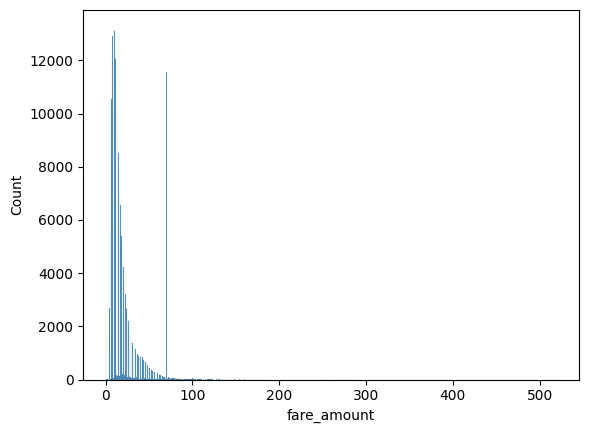

In [91]:
sns.histplot(df.fare_amount)

<Axes: ylabel='fare_amount'>

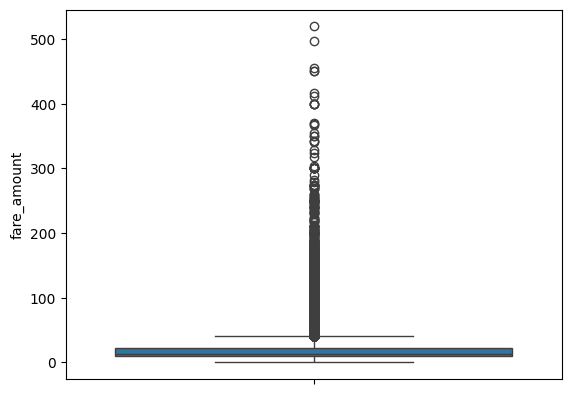

In [92]:
sns.boxplot(df.fare_amount)

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

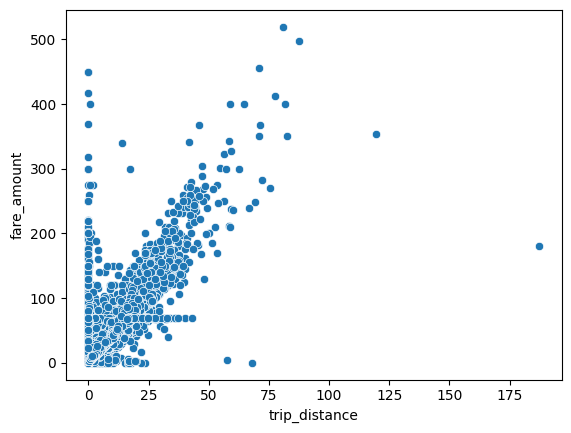

In [93]:
sns.scatterplot(x=df.trip_distance, y=df.fare_amount)

In [94]:
df[(df.fare_amount > 150) & (df.trip_distance < 10)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
10253          2  2023-04-13 18:54:09   2023-04-13 18:54:13              1.0   
14464          1  2023-08-26 16:23:39   2023-08-26 16:26:29              1.0   
27634          1  2023-01-11 12:38:54   2023-01-11 12:38:54              1.0   
42052          2  2023-08-19 21:21:12   2023-08-19 21:21:17              1.0   
47233          2  2023-04-30 22:31:58   2023-04-30 22:32:09              1.0   
65140          1  2023-02-17 18:18:37   2023-02-17 18:18:54              1.0   
66980          2  2023-06-02 16:00:44   2023-06-02 16:01:02              2.0   
72767          2  2023-05-19 21:04:06   2023-05-19 21:04:22              2.0   
73737          2  2023-02-17 13:03:10   2023-02-17 13:03:42              1.0   
77431          1  2023-10-23 15:28:43   2023-10-23 15:32:06              1.0   
87932          1  2023-06-15 11:37:54   2023-06-15 11:39:04              1.0   
104408         2  2023-10-09 21:36:01   2023-10-09 21:39:15              1.0   
109464         2  2023-10-22 20:13:46   2023-10-22 20:14:27              4.0   
120869         1  2023-03-12 21:01:32   2023-03-12 21:03:20              1.0   
123128         2  2023-06-25 18:01:11   2023-06-25 18:01:19              1.0   
133247         2  2023-11-13 18:42:00   2023-11-13 18:42:15              1.0   
133455         2  2023-09-30 02:06:40   2023-09-30 02:12:44              1.0   
134130         2  2023-02-10 08:51:03   2023-02-10 08:51:09              1.0   
138845         2  2023-12-17 02:06:38   2023-12-17 02:06:44              1.0   
148546         2  2023-12-18 16:08:16   2023-12-18 16:32:20              4.0   
149276         2  2023-09-10 04:23:43   2023-09-10 04:23:54              4.0   
165254         1  2023-05-16 13:28:46   2023-05-16 13:29:07              1.0   
171249         2  2023-10-25 15:24:43   2023-10-25 15:24:57              1.0   
171590         1  2023-11-21 17:04:11   2023-11-21 17:05:10              1.0   
178724         2  2023-09-16 11:20:57   2023-09-16 11:21:12              2.0   
181137         1  2023-07-21 17:12:41   2023-07-21 17:14:50              1.0   
189896         1  2023-07-29 16:58:59   2023-07-29 17:00:01              2.0   
197107         2  2023-08-18 19:17:17   2023-08-18 19:34:46              4.0   
201865         2  2023-04-16 22:22:02   2023-04-16 22:22:12              3.0   
203124         2  2023-12-24 14:01:07   2023-12-24 14:01:44              1.0   
205029         2  2023-06-23 14:27:36   2023-06-23 14:27:41              2.0   
211840         2  2023-06-18 12:10:45   2023-06-18 12:12:59              3.0   
213877         1  2023-11-16 19:57:34   2023-11-16 19:57:55              1.0   
215900         2  2023-07-27 00:33:54   2023-07-27 00:34:07              1.0   
229727         2  2023-04-29 23:59:35   2023-04-30 00:00:10              1.0   
231257         2  2023-12-19 00:48:10   2023-12-19 00:48:13              1.0   
236546         2  2023-06-02 01:02:04   2023-06-02 01:02:32              1.0   
263897         1  2023-12-05 22:14:01   2023-12-05 22:14:47              1.0   
267180         2  2023-06-21 21:54:39   2023-06-21 21:54:44              1.0   
271821         2  2023-08-05 00:39:04   2023-08-05 00:39:14              2.0   
278222         1  2023-06-08 04:59:03   2023-06-08 04:59:38              2.0   
280341         2  2023-12-01 10:51:48   2023-12-01 15:14:58              1.0   
285651         2  2023-07-17 13:26:32   2023-07-17 13:26:45              4.0   
285839         2  2023-11-26 10:37:10   2023-11-26 10:37:24              1.0   
287031         1  2023-04-02 22:08:01   2023-04-02 22:09:20              2.0   
287754         2  2023-12-10 01:03:23   2023-12-10 01:03:40              1.0   
287784         1  2023-07-27 10:10:54   2023-07-27 10:11:48              1.0   
291355         2  2023-12-06 02:30:24   2023-12-06 02:30:42              1.0   
291735         2  2023-09-28 11:29:26   2023-09-28 11:30:50              1.0   
292429  

In [95]:
df[(df.fare_amount > 150) & (df.trip_distance < 10)].shape

(51, 19)

In [96]:
df = df[~((df.fare_amount > 150) & (df.trip_distance < 10))]

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

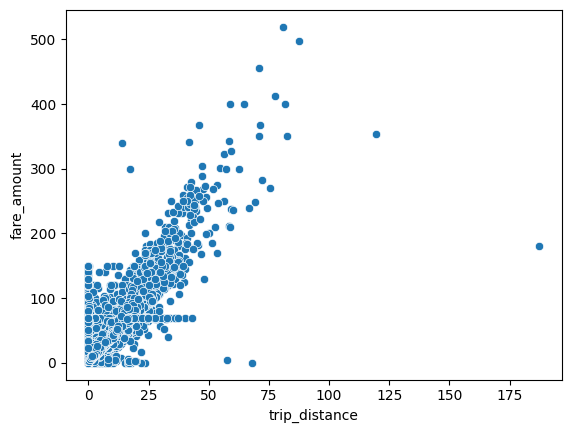

In [97]:
sns.scatterplot(x=df.trip_distance, y=df.fare_amount)

In [98]:
df = df[~((df.trip_distance > 100) & (df.fare_amount < 500))]

In [99]:
sns.scatterplot(x=df.trip_distance, y=df.fare_amount)

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

<Axes: xlabel='trip_distance', ylabel='total_amount'>

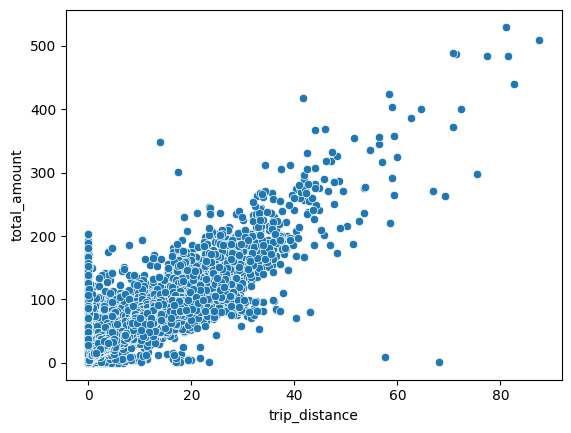

In [100]:
sns.scatterplot(x=df.trip_distance, y=df.total_amount)

In [101]:
df = df[~((df.trip_distance > 50) & (df.total_amount < 10))]

<Axes: xlabel='trip_distance', ylabel='total_amount'>

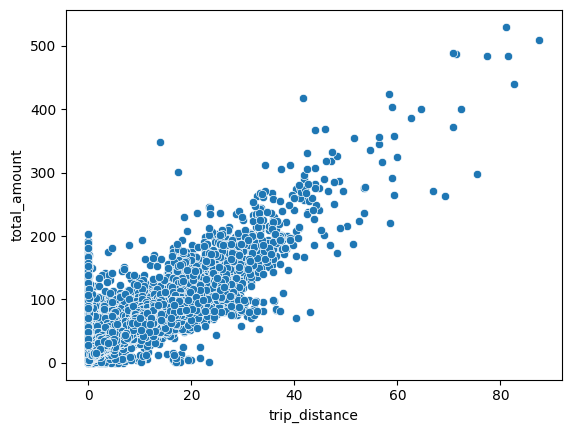

In [102]:
sns.scatterplot(x=df.trip_distance, y=df.total_amount)

In [103]:
df.to_csv('New_df.csv')

In [ ]:
# Do any columns need standardising?
# NO

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### ABove mention column is numerical Category

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [104]:
# Find and show the hourly trends in taxi pickups
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

sns.countplot(x='pickup_hour', data=df)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.show()




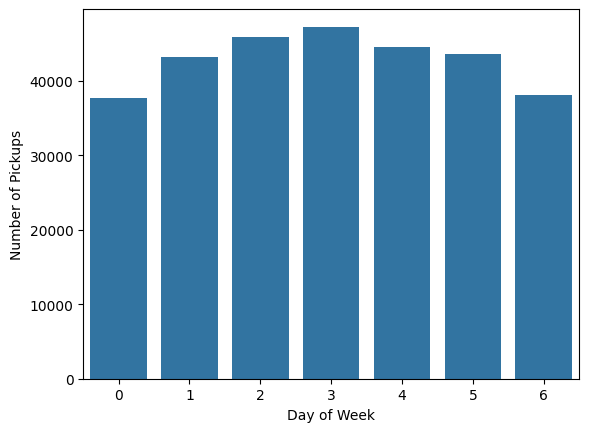

In [105]:
# Find and show the daily trends in taxi pickups (days of the week)
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek

sns.countplot(x='pickup_dayofweek', data=df)
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.show()



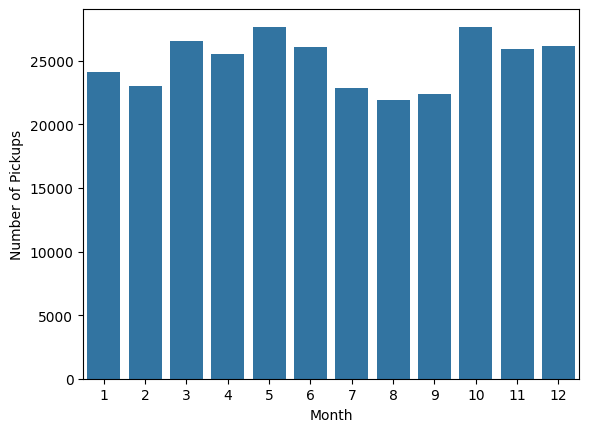

In [106]:
# Show the monthly trends in pickups
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

sns.countplot(x='pickup_month', data=df)
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [107]:
# Analyse the above parameters
columns = ['fare_amount', 'tip_amount', 'total_amount','trip_distance']
zero_negative_counts = {}

for col in columns:
    count_zero = (df[col] == 0).sum()
    count_negative = (df[col] < 0).sum()
    zero_negative_counts[col] = {'zero': count_zero, 'negative': count_negative}

print(zero_negative_counts)


{'fare_amount': {'zero': 96, 'negative': 0}, 'tip_amount': {'zero': 69006, 'negative': 0}, 'total_amount': {'zero': 50, 'negative': 0}, 'trip_distance': {'zero': 5963, 'negative': 0}}


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

Yes

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [108]:
# Create a df with non zero entries for the selected parameters.
# fare amount, total amount and trip distance cant be zero

df_nz = df[df.trip_distance > 0]


In [109]:
df_nz[df_nz.fare_amount == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
95             2  2023-03-17 20:01:04   2023-03-17 20:07:37              1.0   
1106           2  2023-12-09 22:07:44   2023-12-09 22:36:50              1.0   
8276           1  2023-09-26 13:16:50   2023-09-26 13:48:54              1.0   
19773          1  2023-05-15 15:36:14   2023-05-15 15:42:09              1.0   
26634          1  2023-07-29 00:48:21   2023-07-29 00:51:05              1.0   
26713          1  2023-07-19 13:53:31   2023-07-19 14:30:17              1.0   
27680          1  2023-07-19 19:44:35   2023-07-19 20:03:00              1.0   
29636          2  2023-11-08 20:33:27   2023-11-08 20:59:53              1.0   
29877          2  2023-06-05 19:06:30   2023-06-05 19:19:59              1.0   
33585          1  2023-05-14 13:35:27   2023-05-14 13:49:15              1.0   
35751          1  2023-06-01 17:25:23   2023-06-01 17:26:14              1.0   
36777          1  2023-04-01 13:19:50   2023-04-01 13:21:52              1.0   
37891          1  2023-10-30 20:39:18   2023-10-30 21:07:43              1.0   
41168          1  2023-02-07 10:21:51   2023-02-07 10:22:16              1.0   
49930          2  2023-03-05 02:40:08   2023-03-05 02:42:58              2.0   
51508          2  2023-11-14 20:42:13   2023-11-14 20:43:00              1.0   
51692          2  2023-09-05 07:47:58   2023-09-05 08:01:51              1.0   
52636          1  2023-09-01 16:55:39   2023-09-01 17:07:19              2.0   
60181          1  2023-08-26 20:08:42   2023-08-26 20:14:44              1.0   
66085          1  2023-11-02 17:31:38   2023-11-02 18:09:22              1.0   
70195          2  2023-04-11 07:37:23   2023-04-11 08:15:38              1.0   
75895          1  2023-04-01 20:31:24   2023-04-01 20:31:54              1.0   
89174          1  2023-12-08 10:35:02   2023-12-08 11:48:42              1.0   
90923          1  2023-11-09 15:22:24   2023-11-09 16:51:58              1.0   
101986         1  2023-05-28 13:54:23   2023-05-28 13:55:36              2.0   
103837         1  2023-10-31 15:42:05   2023-10-31 15:46:18              1.0   
120691         1  2023-12-14 11:22:38   2023-12-14 11:45:28              1.0   
129586         1  2023-01-26 14:25:31   2023-01-26 14:25:49              1.0   
134506         1  2023-11-28 15:13:35   2023-11-28 16:18:15              1.0   
139484         1  2023-05-25 14:32:58   2023-05-25 14:34:57              1.0   
164425         2  2023-02-07 14:32:54   2023-02-07 15:19:43              1.0   
167426         1  2023-10-04 16:00:21   2023-10-04 17:14:33              1.0   
173320         1  2023-02-19 19:09:58   2023-02-19 19:10:03              1.0   
183515         2  2023-08-30 08:22:27   2023-08-30 08:23:52              1.0   
195129         1  2023-03-21 16:21:10   2023-03-21 16:25:20              1.0   
201468         2  2023-04-11 09:12:25   2023-04-11 09:13:12              1.0   
205930         1  2023-06-07 23:56:02   2023-06-07 23:58:50              1.0   
216225         1  2023-12-19 19:25:04   2023-12-19 19:25:53              1.0   
225653         1  2023-11-16 12:20:28   2023-11-16 12:36:18              1.0   
228680         2  2023-03-23 10:21:00   2023-03-23 10:36:00              1.0   
229516         1  2023-02-15 19:28:54   2023-02-15 19:53:03              1.0   
238262         1  2023-12-23 02:29:14   2023-12-23 02:37:37              1.0   
242086         2  2023-01-21 11:43:46   2023-01-21 11:44:14              1.0   
242820         1  2023-02-03 12:08:18   2023-02-03 12:08:47              1.0   
246426         1  2023-03-10 09:27:56   2023-03-10 09:54:47              3.0   
255430         1  2023-03-30 09:50:01   2023-03-30 09:54:45              1.0   
260099         2  2023-11-27 10:31:06   2023-11-27 10:31:54              1.0   
273705         2  2023-03-03 20:02:23   2023-03-03 20:16:48              1.0   
283418         1  2023-02-23 18:34:02   2023-02-23 18:45:01              1.0   
287470  

In [110]:
columns = ['fare_amount', 'tip_amount', 'total_amount','trip_distance']
zero_negative_counts = {}

for col in columns:
    count_zero = (df_nz[col] == 0).sum()
    count_negative = (df_nz[col] < 0).sum()
    zero_negative_counts[col] = {'zero': count_zero, 'negative': count_negative}

print(zero_negative_counts)

{'fare_amount': {'zero': 51, 'negative': 0}, 'tip_amount': {'zero': 64480, 'negative': 0}, 'total_amount': {'zero': 17, 'negative': 0}, 'trip_distance': {'zero': 0, 'negative': 0}}


In [113]:
df_nz = df_nz[df_nz.tip_amount > 0]

In [116]:
df_nz = df_nz[df_nz.fare_amount > 0]

In [117]:
columns = ['fare_amount', 'tip_amount', 'total_amount','trip_distance']
zero_negative_counts = {}

for col in columns:
    count_zero = (df_nz[col] == 0).sum()
    count_negative = (df_nz[col] < 0).sum()
    zero_negative_counts[col] = {'zero': count_zero, 'negative': count_negative}

print(zero_negative_counts)

{'fare_amount': {'zero': 0, 'negative': 0}, 'tip_amount': {'zero': 0, 'negative': 0}, 'total_amount': {'zero': 0, 'negative': 0}, 'trip_distance': {'zero': 0, 'negative': 0}}


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [118]:
df_nz.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1         2  2023-12-07 23:24:45   2023-12-07 23:47:36              1.0   
3         2  2023-11-29 19:16:41   2023-11-29 19:26:35              1.0   
5         2  2023-05-14 19:36:30   2023-05-14 19:43:52              1.0   
6         2  2023-12-22 00:34:11   2023-12-22 00:48:28              1.0   
8         2  2023-02-12 17:48:31   2023-02-12 18:04:32              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
1           3.39         1.0                  N           231           230   
3           1.12         1.0                  N           163           229   
5           2.03         1.0                  N           107           141   
6           2.53         1.0                  N           140           143   
8           3.37         1.0                  N           249            48   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
1             1  ...      0.5        5.38           0.0   
3             1  ...      0.5        2.00           0.0   
5             1  ...      0.5        2.94           0.0   
6             1  ...      0.5        4.12           0.0   
8             1  ...      0.5        2.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
1                    1.0         32.28                   2.5          0.0   
3                    1.0         19.20                   2.5          0.0   
5                    1.0         17.64                   2.5          0.0   
6                    1.0         24.72                   2.5          0.0   
8                    1.0         25.10                   2.5          0.0   

   pickup_hour  pickup_dayofweek  pickup_month  
1           23                 3            12  
3           19                 2            11  
5           19                 6             5  
6            0                 4            12  
8           17                 6             2  

[5 rows x 22 columns]

In [119]:
# Group data by month and analyse monthly revenue
df_nz.groupby('pickup_month')['total_amount'].aggregate(['sum', 'max', 'min', 'median', 'mean'])


sum     max   min  median       mean
pickup_month                                            
1             524784.10  254.45  5.50   21.00  28.317726
2             509740.91  334.93  5.40   21.00  28.290649
3             596354.56  483.85  6.20   21.45  28.805224
4             576099.93  418.20  6.24   21.60  29.294210
5             645290.65  317.85  6.49   22.20  30.063858
6             599247.26  326.05  6.24   21.88  29.714249
7             514147.08  423.95  5.40   21.84  30.070598
8             487701.05  317.55  6.40   21.84  30.248778
9             521204.00  487.61  5.21   22.32  30.771284
10            647166.08  484.20  6.24   22.50  30.582963
11            598056.91  306.75  6.76   22.20  29.730409
12            585044.27  366.74  6.20   22.25  29.997655

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [131]:
# Calculate proportion of each quarter
monthly_revenue = df_nz.groupby('pickup_month')['total_amount'].agg(['sum'])


In [132]:
# Define quarterly groups
monthly_revenue['quarter'] = pd.cut(
    monthly_revenue.index,
    bins=[0, 3, 6, 9, 12],
    labels=['Q1', 'Q2', 'Q3', 'Q4']
)

# Group by quarter and sum revenue
quarterly_revenue = monthly_revenue.groupby('quarter')['sum'].sum()

# Calculate total yearly revenue
total_yearly_revenue = quarterly_revenue.sum()

# Calculate proportion of each quarter
revenue_proportion = (quarterly_revenue / total_yearly_revenue) * 100

# Display result
print(revenue_proportion)

quarter
Q1    23.966476
Q2    26.755055
Q3    22.381905
Q4    26.896564
Name: sum, dtype: float64


/var/folders/9b/nxjnhndd3pz9n02mxzxxs20c0000gn/T/ipykernel_2756/1343546162.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quarterly_revenue = monthly_revenue.groupby('quarter')['sum'].sum()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

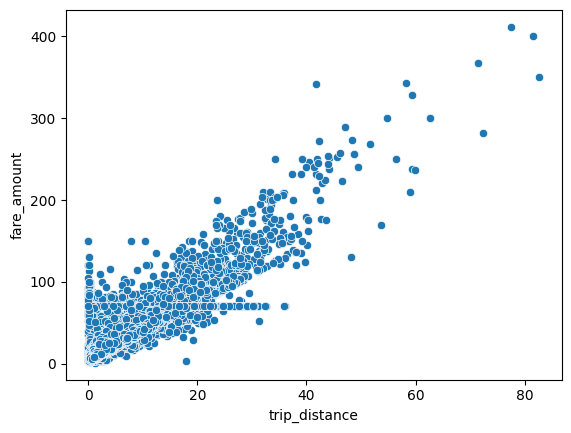

In [133]:
# Show how trip fare is affected by distance
sns.scatterplot(x=df_nz.trip_distance, y=df_nz.fare_amount)


In [134]:
round(df_nz.trip_distance.corr(df_nz.fare_amount), 3)

0.953

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [135]:
df_nz.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
pickup_hour                       int32
pickup_dayofweek                  int32
pickup_month                      int32
dtype: object

In [136]:
# Show relationship between fare and trip duration
# Calculate trip_duration in minutes
df_nz['trip_duration'] = (df_nz.tpep_dropoff_datetime - df_nz.tpep_pickup_datetime).dt.total_seconds()/60


In [137]:
# Calculate correlation between trip_duration and fare_amount
round(df_nz.trip_duration.corr(df_nz.fare_amount),2)

0.32

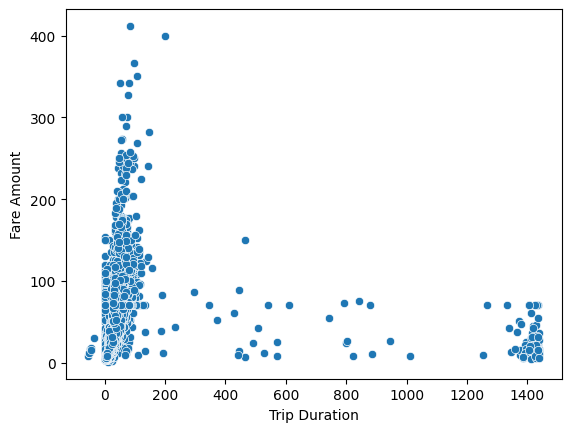

In [138]:
sns.scatterplot(x=df_nz.trip_duration, y = df_nz.fare_amount)
plt.xlabel('Trip Duration')
plt.ylabel('Fare Amount')
plt.show()

<Axes: xlabel='passenger_count', ylabel='fare_amount'>

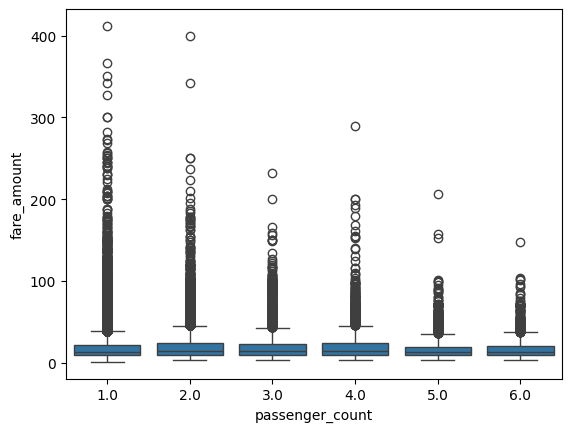

In [139]:
# Show relationship between fare and number of passengers
sns.boxplot(x='passenger_count', y='fare_amount', data=df_nz)


In [140]:
round(df_nz.fare_amount.corr(df_nz.passenger_count),3)

0.036

In [141]:
# Show relationship between tip and trip distance
sns.scatterplot(x=df_nz.trip_distance, y=df_nz.tip_amount)

<Axes: xlabel='trip_distance', ylabel='tip_amount'>

In [142]:
round(df_nz.tip_amount.corr(df_nz.trip_distance),3)

0.807

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

<Axes: xlabel='payment_type', ylabel='count'>

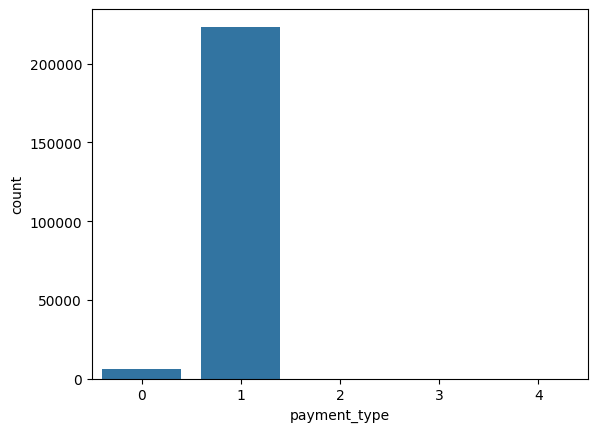

In [143]:
# Analyse the distribution of different payment types (payment_type).
sns.countplot(x='payment_type', data=df_nz)




- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [144]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('../taxi_zones/taxi_zones.shp')# read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [145]:
# print(zones.info())
# zones.plot()

In [146]:
zones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB


<Axes: >

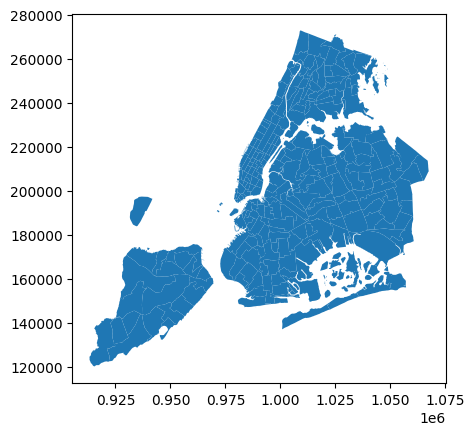

In [147]:
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [148]:
# Merge zones and trip records using locationID and PULocationID

df_merge = df_nz.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')


In [149]:
df_merge.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-07 23:24:45   2023-12-07 23:47:36              1.0   
1         2  2023-11-29 19:16:41   2023-11-29 19:26:35              1.0   
2         2  2023-05-14 19:36:30   2023-05-14 19:43:52              1.0   
3         2  2023-12-22 00:34:11   2023-12-22 00:48:28              1.0   
4         2  2023-02-12 17:48:31   2023-02-12 18:04:32              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.39         1.0                  N           231           230   
1           1.12         1.0                  N           163           229   
2           2.03         1.0                  N           107           141   
3           2.53         1.0                  N           140           143   
4           3.37         1.0                  N           249            48   

   payment_type  ...  pickup_dayofweek  pickup_month  trip_duration  OBJECTID  \
0             1  ...                 3            12      22.850000     231.0   
1             1  ...                 2            11       9.900000     163.0   
2             1  ...                 6             5       7.366667     107.0   
3             1  ...                 4            12      14.283333     140.0   
4             1  ...                 6             2      16.016667     249.0   

   Shape_Leng  Shape_Area                  zone  LocationID    borough  \
0    0.063420    0.000167  TriBeCa/Civic Center       231.0  Manhattan   
1    0.034177    0.000041         Midtown North       163.0  Manhattan   
2    0.038041    0.000075              Gramercy       107.0  Manhattan   
3    0.047584    0.000114       Lenox Hill East       140.0  Manhattan   
4    0.036384    0.000072          West Village       249.0  Manhattan   

                                            geometry  
0  POLYGON ((981667.364 203305, 981854.109 203130...  
1  POLYGON ((989412.663 219020.943, 990045.841 21...  
2  POLYGON ((989131.643 205749.904, 989084.531 20...  
3  POLYGON ((995735.062 215619.835, 995670.105 21...  
4  POLYGON ((983555.319 204876.901, 983469.158 20...  

[5 rows x 30 columns]

In [150]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229493 entries, 0 to 229492
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               229493 non-null  int64         
 1   tpep_pickup_datetime   229493 non-null  datetime64[us]
 2   tpep_dropoff_datetime  229493 non-null  datetime64[us]
 3   passenger_count        229493 non-null  float64       
 4   trip_distance          229493 non-null  float64       
 5   RatecodeID             229493 non-null  float64       
 6   store_and_fwd_flag     223431 non-null  object        
 7   PULocationID           229493 non-null  int64         
 8   DOLocationID           229493 non-null  int64         
 9   payment_type           229493 non-null  int64         
 10  fare_amount            229493 non-null  float64       
 11  extra                  229493 non-null  float64       
 12  mta_tax                229493 non-null  floa

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [155]:
# Group data by location and calculate the number of trips

trip_by_location = df_merge.groupby('PULocationID').size().reset_index(name='trip_count')

In [158]:
trip_by_location.head()

PULocationID  trip_count
0             1           5
1             2           1
2             4         249
3             7          61
4            10          35

<Axes: xlabel='PULocationID', ylabel='trip_count'>

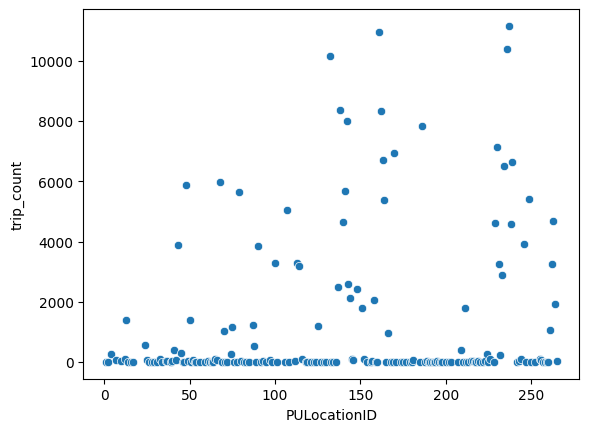

In [157]:
sns.scatterplot(x=trip_by_location.PULocationID, y=trip_by_location.trip_count)

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [159]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(trip_by_location, left_on='LocationID',right_on='PULocationID', how='left')


In [160]:
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  trip_count  
0           1.0         5.0  
1           2.0         1.0  
2           NaN         NaN  
3           4.0       249.0  
4           NaN         NaN

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

<Axes: >

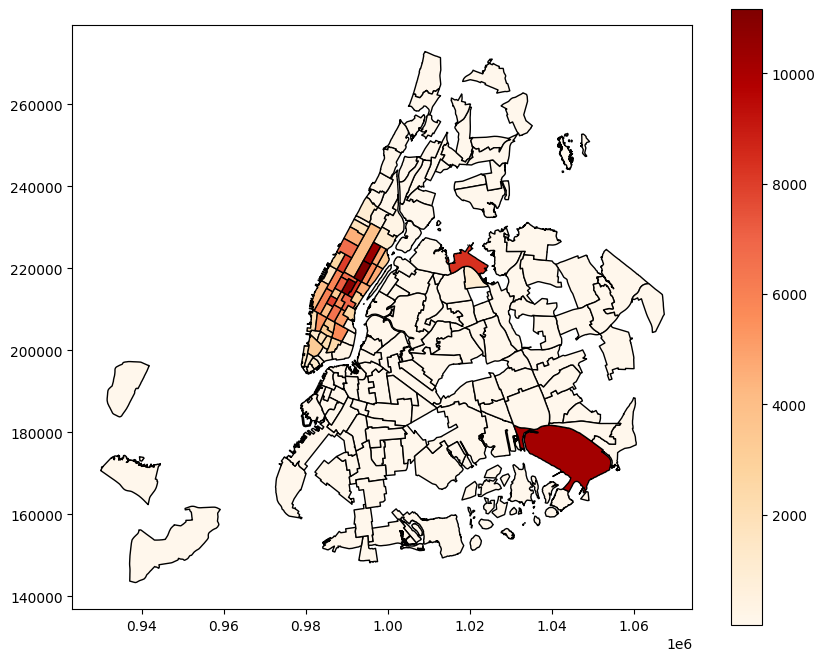

In [161]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Plot the map and display it
zones.plot(column='trip_count', ax=ax, legend=True, cmap='OrRd', edgecolor='black')


In [162]:
# can you try displaying the zones DF sorted by the number of trips?

zones.sort_values('trip_count', ascending=False)

OBJECTID  Shape_Leng  Shape_Area                      zone  LocationID  \
236       237    0.042213    0.000096     Upper East Side South         237   
160       161    0.035804    0.000072            Midtown Center         161   
235       236    0.044252    0.000103     Upper East Side North         236   
131       132    0.245479    0.002038               JFK Airport         132   
137       138    0.107467    0.000537         LaGuardia Airport         138   
..        ...         ...         ...                       ...         ...   
244       245    0.095983    0.000466             West Brighton         245   
247       248    0.056919    0.000150    West Farms/Bronx River         248   
250       251    0.137711    0.000626               Westerleigh         251   
252       253    0.036051    0.000078             Willets Point         253   
253       254    0.085886    0.000360  Williamsbridge/Olinville         254   

           borough                                           geometry  \
236      Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160      Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235      Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
131         Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
137         Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...   
..             ...                                                ...   
244  Staten Island  POLYGON ((957085.564 172591.26, 957142.385 172...   
247          Bronx  POLYGON ((1021898.26 245357.487, 1022005.186 2...   
250  Staten Island  POLYGON ((947868.004 169247.734, 948000.981 16...   
252         Queens  POLYGON ((1028825.348 218121.42, 1029152.461 2...   
253          Bronx  POLYGON ((1025214.477 259577.301, 1025348.099 ...   

     PULocationID  trip_count  
236         237.0     11162.0  
160         161.0     10968.0  
235         236.0     10402.0  
131         132.0     10163.0  
137         138.0      8369.0  
..            ...         ...  
244           NaN         NaN  
247           NaN         NaN  
250           NaN         NaN  
252           NaN         NaN  
253           NaN         NaN  

[263 rows x 9 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [163]:
# Find routes which have the slowest speeds at different times of the day
df_merge.head()



VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-07 23:24:45   2023-12-07 23:47:36              1.0   
1         2  2023-11-29 19:16:41   2023-11-29 19:26:35              1.0   
2         2  2023-05-14 19:36:30   2023-05-14 19:43:52              1.0   
3         2  2023-12-22 00:34:11   2023-12-22 00:48:28              1.0   
4         2  2023-02-12 17:48:31   2023-02-12 18:04:32              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.39         1.0                  N           231           230   
1           1.12         1.0                  N           163           229   
2           2.03         1.0                  N           107           141   
3           2.53         1.0                  N           140           143   
4           3.37         1.0                  N           249            48   

   payment_type  ...  pickup_dayofweek  pickup_month  trip_duration  OBJECTID  \
0             1  ...                 3            12      22.850000     231.0   
1             1  ...                 2            11       9.900000     163.0   
2             1  ...                 6             5       7.366667     107.0   
3             1  ...                 4            12      14.283333     140.0   
4             1  ...                 6             2      16.016667     249.0   

   Shape_Leng  Shape_Area                  zone  LocationID    borough  \
0    0.063420    0.000167  TriBeCa/Civic Center       231.0  Manhattan   
1    0.034177    0.000041         Midtown North       163.0  Manhattan   
2    0.038041    0.000075              Gramercy       107.0  Manhattan   
3    0.047584    0.000114       Lenox Hill East       140.0  Manhattan   
4    0.036384    0.000072          West Village       249.0  Manhattan   

                                            geometry  
0  POLYGON ((981667.364 203305, 981854.109 203130...  
1  POLYGON ((989412.663 219020.943, 990045.841 21...  
2  POLYGON ((989131.643 205749.904, 989084.531 20...  
3  POLYGON ((995735.062 215619.835, 995670.105 21...  
4  POLYGON ((983555.319 204876.901, 983469.158 20...  

[5 rows x 30 columns]

In [164]:
df_merge['trip_duration_hour'] = round(df_merge.trip_duration/60,2)

In [165]:
df_merge.trip_duration_hour

0         0.38
1         0.16
2         0.12
3         0.24
4         0.27
          ... 
229488    0.10
229489    0.13
229490    0.44
229491    0.12
229492    0.39
Name: trip_duration_hour, Length: 229493, dtype: float64

In [166]:
df_merge['speed'] = df_merge.trip_distance/df_merge.trip_duration_hour

In [167]:
df_merge.speed

0          8.921053
1          7.000000
2         16.916667
3         10.541667
4         12.481481
            ...    
229488    11.900000
229489    18.076923
229490     8.636364
229491     9.000000
229492    18.051282
Name: speed, Length: 229493, dtype: float64

In [168]:
df_merge['route'] = df_merge.PULocationID.astype('str') + '-' + df_merge.DOLocationID.astype('str')

In [169]:
df_merge['pickup_hour'] = df_merge.tpep_pickup_datetime.dt.hour

In [170]:
slowest_speed = df_merge.groupby(['route','pickup_hour'])['speed'].mean().reset_index()

In [171]:
slowest_routes = slowest_speed.sort_values('speed')

In [172]:
slowest_routes.head()

route  pickup_hour     speed
26719  186-232            1 -4.594595
37823  238-263            1 -2.190476
4031   114-249            7  0.034647
45686   43-140           20  0.084424
27721   209-25           22  0.106061

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

/var/folders/9b/nxjnhndd3pz9n02mxzxxs20c0000gn/T/ipykernel_2756/2443415875.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values, palette='viridis')


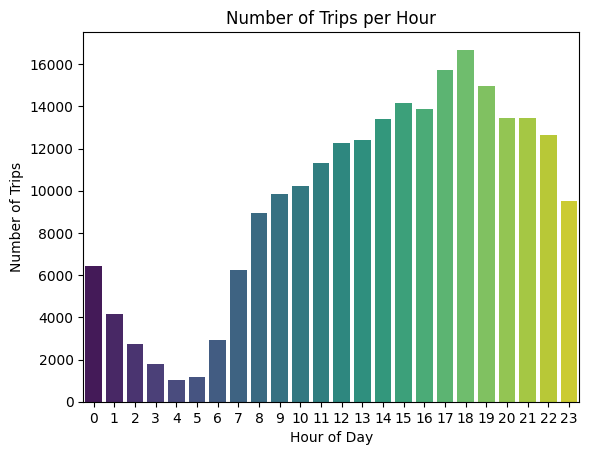

In [173]:
# Visualise the number of trips per hour and find the busiest hour
trips_per_hour = df_merge['pickup_hour'].value_counts().sort_index()
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values, palette='viridis')

plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Hour')
plt.show()

In [174]:
trips_per_hour.idxmax()

18

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [175]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
trips_per_hour_scaled = trips_per_hour / sample_fraction

sns.barplot(x=trips_per_hour_scaled.index, y=trips_per_hour_scaled.values, palette='magma')
plt.xlabel('Hour of Day')
plt.ylabel('Estimated Total Trips')
plt.title('Estimated Total Trips per Hour (Scaled)')
plt.show()



/var/folders/9b/nxjnhndd3pz9n02mxzxxs20c0000gn/T/ipykernel_2756/1624132151.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trips_per_hour_scaled.index, y=trips_per_hour_scaled.values, palette='magma')


In [ ]:
trips_per_hour_scaled.idxmax()

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

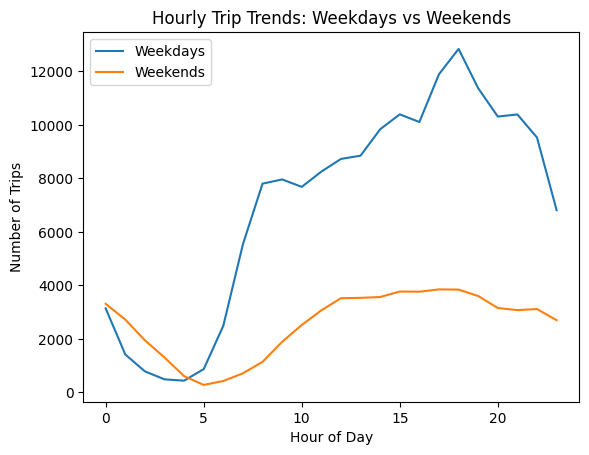

In [176]:
# Compare traffic trends for the week days and weekends
# Create a column for day of week (0=Monday, 6=Sunday)
df_merge['day_of_week'] = df_merge['tpep_pickup_datetime'].dt.dayofweek

# Create a column for weekend indicator
df_merge['is_weekend'] = df_merge['day_of_week'] >= 5

# Count trips per hour separately for weekdays and weekends
weekday_trips = df_merge[df_merge['is_weekend'] == False]['pickup_hour'].value_counts().sort_index()
weekend_trips = df_merge[df_merge['is_weekend'] == True]['pickup_hour'].value_counts().sort_index()

# Plot comparison
plt.plot(weekday_trips.index, weekday_trips.values, label='Weekdays')
plt.plot(weekend_trips.index, weekend_trips.values, label='Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Hourly Trip Trends: Weekdays vs Weekends')
plt.legend()
plt.show()



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [177]:
# Find top 10 pickup and dropoff zones
top_10_pickup = df_merge['PULocationID'].value_counts().head(10)
top_10_pickup

PULocationID
237    11162
161    10968
236    10402
132    10163
138     8369
162     8336
142     7989
186     7827
230     7143
170     6932
Name: count, dtype: int64

In [178]:
top_10_drop = df_merge['DOLocationID'].value_counts().head(10)
top_10_drop

DOLocationID
236    11059
237    10147
161     8948
239     6950
170     6934
142     6694
162     6638
141     6470
230     6249
68      5832
Name: count, dtype: int64

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [179]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Count pickups and dropoffs by zone
pickup_counts = df_merge['PULocationID'].value_counts()
dropoff_counts = df_merge['DOLocationID'].value_counts()

# Combine into DataFrame
pickup_dropoff = pd.DataFrame({'pickup': pickup_counts, 'dropoff': dropoff_counts}).fillna(0)

# Calculate pickup/dropoff ratio
pickup_dropoff['pickup_dropoff_ratio'] = pickup_dropoff['pickup'] / (pickup_dropoff['dropoff'] )

# Sort and get top 10 and bottom 10
top10_ratio = pickup_dropoff.sort_values('pickup_dropoff_ratio', ascending=False).head(10)
bottom10_ratio = pickup_dropoff.sort_values('pickup_dropoff_ratio').head(10)

print('Top 10 Pickup/Dropoff Ratios:')
print(top10_ratio[['pickup', 'dropoff', 'pickup_dropoff_ratio']])

print('\nBottom 10 Pickup/Dropoff Ratios:')
print(bottom10_ratio[['pickup', 'dropoff', 'pickup_dropoff_ratio']])

Top 10 Pickup/Dropoff Ratios:
      pickup  dropoff  pickup_dropoff_ratio
156      1.0      0.0                   inf
2        1.0      0.0                   inf
70    1029.0     75.0             13.720000
132  10163.0   2352.0              4.321003
138   8369.0   3235.0              2.587017
186   7827.0   4703.0              1.664257
207      3.0      2.0              1.500000
43    3886.0   2687.0              1.446223
114   3177.0   2298.0              1.382507
215     23.0     17.0              1.352941

Bottom 10 Pickup/Dropoff Ratios:
     pickup  dropoff  pickup_dropoff_ratio
135     0.0     46.0                   0.0
126     0.0      5.0                   0.0
128     0.0     15.0                   0.0
131     0.0     26.0                   0.0
139     0.0     16.0                   0.0
147     0.0      5.0                   0.0
149     0.0     19.0                   0.0
122     0.0      6.0                   0.0
150     0.0      9.0                   0.0
155     0.0     18.0  

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [180]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_df = df_merge[(df_merge['pickup_hour'] >= 5) & (df_merge['pickup_hour'] < 23)]


In [181]:
top_night_pickup = night_df['PULocationID'].value_counts().head(10).index.tolist()
top_night_dropoff = night_df['DOLocationID'].value_counts().head(10).index.tolist()

In [182]:
filter_zone = night_df[(night_df['PULocationID'].isin(top_night_pickup)) | (night_df['DOLocationID'].isin(top_night_dropoff))]

In [183]:
filter_zone[['PULocationID', 'DOLocationID', 'zone']].head(10)

PULocationID  DOLocationID                          zone
2            107           141                      Gramercy
5            162           238                  Midtown East
6             48           237                  Clinton East
8            186           162  Penn Station/Madison Sq West
12           161           239                Midtown Center
13           239           249         Upper West Side South
17           238           141         Upper West Side North
18           162           141                  Midtown East
19           237           137         Upper East Side South
24           114           162       Greenwich Village South

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [184]:
# Filter for night hours (11 PM to 5 AM)

# Define nighttime (23-5) and daytime (5-23)
night_revenue = df_merge[(df_merge['pickup_hour'] >= 23) | (df_merge['pickup_hour'] < 5)]['total_amount'].sum()
day_revenue = df_merge[(df_merge['pickup_hour'] >= 5) & (df_merge['pickup_hour'] < 23)]['total_amount'].sum()

# Calculate total revenue
total_revenue = night_revenue + day_revenue

# Calculate revenue share
night_share = night_revenue / total_revenue * 100
day_share = day_revenue / total_revenue * 100

print(f"Nighttime revenue share: {night_share:.2f}%")
print(f"Daytime revenue share: {day_share:.2f}%")

Nighttime revenue share: 11.10%
Daytime revenue share: 88.90%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [185]:
# Analyse the fare per mile per passenger for different passenger counts

df_merge['fare_per_mile'] = df_merge['fare_amount'] / df_merge['trip_distance']

# Group by passenger count and calculate average fare per mile
avg_fare_per_mile = df_merge.groupby('passenger_count')['fare_per_mile'].mean()

# Calculate fare per mile per passenger
fare_per_mile_per_passenger = avg_fare_per_mile / avg_fare_per_mile.index

# Display result
print(fare_per_mile_per_passenger)



passenger_count
1.0    9.419053
2.0    5.135842
3.0    3.125609
4.0    3.574570
5.0    1.721558
6.0    1.280922
dtype: float64


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [186]:
# Compare the average fare per mile for different days and for different times of the day


# Average fare per mile by day of week
avg_fare_per_mile_day = df_merge.groupby('pickup_dayofweek')['fare_per_mile'].mean()
print('Average Fare per Mile by Day of Week:')
print(avg_fare_per_mile_day)

# Average fare per mile by hour of day
avg_fare_per_mile_hour = df_merge.groupby('pickup_hour')['fare_per_mile'].mean()
print('\nAverage Fare per Mile by Hour of Day:')
print(avg_fare_per_mile_hour)

Average Fare per Mile by Day of Week:
pickup_dayofweek
0     9.273883
1     9.876298
2     9.745680
3     9.598218
4    10.288503
5     9.027516
6     9.276448
Name: fare_per_mile, dtype: float64

Average Fare per Mile by Hour of Day:
pickup_hour
0      6.991629
1      9.004576
2      8.821626
3      7.425158
4      6.582407
5     21.862047
6      8.808353
7     10.306583
8      8.271057
9      9.076204
10    10.345393
11     9.914417
12    10.025959
13    10.334436
14    10.123848
15    10.389241
16    11.490910
17    11.927740
18    10.773836
19     8.934021
20     7.949882
21     7.681088
22     8.386050
23     7.153227
Name: fare_per_mile, dtype: float64


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [187]:
# Compare fare per mile for different vendors

avg_fare_per_mile_vendor = df_merge.groupby('VendorID')['fare_per_mile'].mean()

# Display result
print('Average Fare per Mile by Vendor:')
print(avg_fare_per_mile_vendor)

Average Fare per Mile by Vendor:
VendorID
1     7.872378
2    10.190304
Name: fare_per_mile, dtype: float64


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [188]:
# Defining distance tiers

# Create distance tier categories
df_merge['distance_tier'] = pd.cut(
    df_merge['trip_distance'],
    bins=[0, 2, 5, float('inf')],
    labels=['0-2 miles', '2-5 miles', '5+ miles']
)

# Group by VendorID and distance tier, calculate average fare per mile
tiered_fare_comparison = df_merge.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

# Display result
print(tiered_fare_comparison)

   VendorID distance_tier  fare_per_mile
0         1     0-2 miles       9.447794
1         1     2-5 miles       6.366327
2         1      5+ miles       4.452630
3         2     0-2 miles      14.066730
4         2     2-5 miles       6.529263
5         2      5+ miles       4.478730


/var/folders/9b/nxjnhndd3pz9n02mxzxxs20c0000gn/T/ipykernel_2756/3748422063.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tiered_fare_comparison = df_merge.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [189]:
df_merge.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-07 23:24:45   2023-12-07 23:47:36              1.0   
1         2  2023-11-29 19:16:41   2023-11-29 19:26:35              1.0   
2         2  2023-05-14 19:36:30   2023-05-14 19:43:52              1.0   
3         2  2023-12-22 00:34:11   2023-12-22 00:48:28              1.0   
4         2  2023-02-12 17:48:31   2023-02-12 18:04:32              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.39         1.0                  N           231           230   
1           1.12         1.0                  N           163           229   
2           2.03         1.0                  N           107           141   
3           2.53         1.0                  N           140           143   
4           3.37         1.0                  N           249            48   

   payment_type  ...  LocationID    borough  \
0             1  ...       231.0  Manhattan   
1             1  ...       163.0  Manhattan   
2             1  ...       107.0  Manhattan   
3             1  ...       140.0  Manhattan   
4             1  ...       249.0  Manhattan   

                                            geometry  trip_duration_hour  \
0  POLYGON ((981667.364 203305, 981854.109 203130...                0.38   
1  POLYGON ((989412.663 219020.943, 990045.841 21...                0.16   
2  POLYGON ((989131.643 205749.904, 989084.531 20...                0.12   
3  POLYGON ((995735.062 215619.835, 995670.105 21...                0.24   
4  POLYGON ((983555.319 204876.901, 983469.158 20...                0.27   

       speed    route  day_of_week  is_weekend  fare_per_mile  distance_tier  
0   8.921053  231-230            3       False       6.460177      2-5 miles  
1   7.000000  163-229            2       False       9.553571      0-2 miles  
2  16.916667  107-141            6        True       5.270936      2-5 miles  
3  10.541667  140-143            4       False       6.166008      2-5 miles  
4  12.481481   249-48            6        True       5.667656      2-5 miles  

[5 rows x 37 columns]

In [190]:
#  Analyze tip percentages based on distances, passenger counts and pickup times


# Calculate tip percentage
df_merge['tip_percentage'] = (df_merge['tip_amount'] / df_merge['fare_amount']) * 100

avg_tip_by_distance = df_merge.groupby('distance_tier')['tip_percentage'].mean()
print('Average Tip Percentage by Distance Tier:')
print(avg_tip_by_distance)

# Average tip percentage by passenger count
avg_tip_by_passenger = df_merge.groupby('passenger_count')['tip_percentage'].mean()
print('\nAverage Tip Percentage by Passenger Count:')
print(avg_tip_by_passenger)

# Average tip percentage by pickup hour
avg_tip_by_hour = df_merge.groupby('pickup_hour')['tip_percentage'].mean()
print('\nAverage Tip Percentage by Pickup Hour:')
print(avg_tip_by_hour)


Average Tip Percentage by Distance Tier:
distance_tier
0-2 miles    28.714265
2-5 miles    23.061298
5+ miles     21.928821
Name: tip_percentage, dtype: float64

Average Tip Percentage by Passenger Count:
passenger_count
1.0    25.989841
2.0    25.786744
3.0    25.844376
4.0    25.916880
5.0    26.112747
6.0    25.700043
Name: tip_percentage, dtype: float64

Average Tip Percentage by Pickup Hour:
pickup_hour
0     25.539876
1     26.218986
2     26.089658
3     28.259108
4     25.109228
5     25.588136
6     24.617564
7     24.859178
8     24.871131
9     25.027616
10    25.493843
11    25.280453
12    25.332032
13    25.254122
14    25.035031
15    24.931956
16    27.075764
17    27.063382
18    27.379107
19    27.250800
20    26.453211
21    26.141512
22    26.074287
23    25.548049
Name: tip_percentage, dtype: float64


/var/folders/9b/nxjnhndd3pz9n02mxzxxs20c0000gn/T/ipykernel_2756/2286012784.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_by_distance = df_merge.groupby('distance_tier')['tip_percentage'].mean()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [191]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%# Filter trips with tip percentage < 10%
low_tip_trips = df_merge[df_merge['tip_percentage'] < 10]

# Filter trips with tip percentage > 25%
high_tip_trips = df_merge[df_merge['tip_percentage'] > 25]

# Compare average trip distance
avg_distance_low_tip = low_tip_trips['trip_distance'].mean()
avg_distance_high_tip = high_tip_trips['trip_distance'].mean()

# Compare average fare amount
avg_fare_low_tip = low_tip_trips['fare_amount'].mean()
avg_fare_high_tip = high_tip_trips['fare_amount'].mean()

# Compare average passenger count
avg_passenger_low_tip = low_tip_trips['passenger_count'].mean()
avg_passenger_high_tip = high_tip_trips['passenger_count'].mean()

print('Average Trip Distance - Low Tip (<10%):', avg_distance_low_tip)
print('Average Trip Distance - High Tip (>25%):', avg_distance_high_tip)
print('\nAverage Fare Amount - Low Tip (<10%):', avg_fare_low_tip)
print('Average Fare Amount - High Tip (>25%):', avg_fare_high_tip)
print('\nAverage Passenger Count - Low Tip (<10%):', avg_passenger_low_tip)
print('Average Passenger Count - High Tip (>25%):', avg_passenger_high_tip)


Average Trip Distance - Low Tip (<10%): 4.944559648694804
Average Trip Distance - High Tip (>25%): 2.3172093648671495

Average Fare Amount - Low Tip (<10%): 26.494730422054158
Average Fare Amount - High Tip (>25%): 14.44785656109293

Average Passenger Count - Low Tip (<10%): 1.3619582011872815
Average Passenger Count - High Tip (>25%): 1.3586741044672905


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [194]:
# See how passenger count varies across hours and days
df_merge.groupby('pickup_hour')['passenger_count'].mean()

pickup_hour
0     1.432156
1     1.413028
2     1.444161
3     1.402446
4     1.360266
5     1.208981
6     1.267692
7     1.262141
8     1.278181
9     1.282598
10    1.317073
11    1.363083
12    1.348976
13    1.353943
14    1.374730
15    1.390430
16    1.375802
17    1.365738
18    1.343201
19    1.356146
20    1.360849
21    1.414297
22    1.408681
23    1.407271
Name: passenger_count, dtype: float64

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

<Axes: xlabel='pickup_hour'>

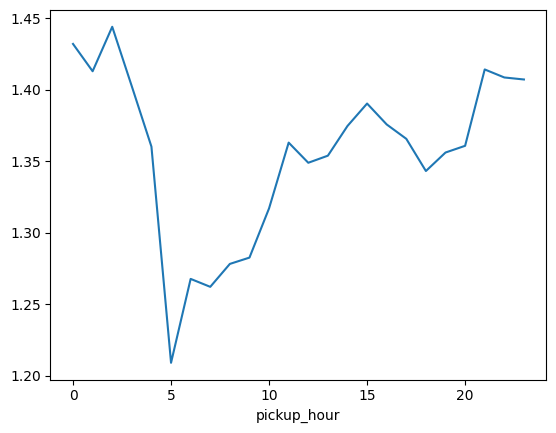

In [195]:
sns.lineplot(x=avg_passenger_hour.index, y=avg_passenger_hour.values)

In [196]:
avg_passenger_day = df_merge.groupby('pickup_dayofweek')['passenger_count'].mean()

<Axes: xlabel='pickup_dayofweek'>

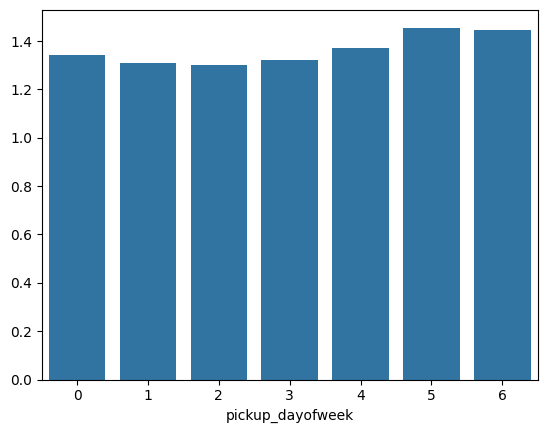

In [197]:
sns.barplot(x=avg_passenger_day.index, y=avg_passenger_day.values)

In [198]:
# How does passenger count vary across zones

df_merge.groupby('zone')['passenger_count'].mean().reset_index()


zone  passenger_count
0         Alphabet City         1.389558
1               Astoria         1.131148
2          Baisley Park         1.600000
3          Battery Park         1.761364
4     Battery Park City         1.378109
..                  ...              ...
178  Woodlawn/Wakefield         1.000000
179            Woodside         1.071429
180  World Trade Center         1.455231
181      Yorkville East         1.319556
182      Yorkville West         1.314035

[183 rows x 2 columns]

In [199]:
# Average passenger count by pickup zone
avg_passenger_zone = df_merge.groupby('PULocationID')['passenger_count'].mean().reset_index()

# Merge with zone names
zone_passenger = avg_passenger_zone.merge(
    df_merge[['PULocationID', 'zone']].drop_duplicates(),
    on='PULocationID',
    how='left'
)

# Show top zones with highest average passenger count
zone_passenger_sorted = zone_passenger.sort_values('passenger_count', ascending=False)
print(zone_passenger_sorted.head(10))

     PULocationID  passenger_count                              zone
115           171         3.000000                Murray Hill-Queens
138           207         2.666667  Saint Michaels Cemetery/Woodside
35             56         2.500000                            Corona
76            119         2.500000                        Highbridge
38             62         2.166667               Crown Heights South
79            124         2.000000                      Howard Beach
117           175         2.000000                   Oakland Gardens
130           194         2.000000                   Randalls Island
131           195         2.000000                          Red Hook
137           203         2.000000                          Rosedale


In [200]:
zones.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry', 'PULocationID', 'trip_count'],
      dtype='object')

In [201]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.


# Group by PULocationID to get number of trips per location
trips_per_location = df_merge.groupby('PULocationID').size().reset_index(name='trip_count')

# Merge taxi zones with trip counts
zones_with_trips = zones.merge(trips_per_location, left_on='LocationID', right_on='PULocationID', how='left')


# Calculate average passenger count per pickup zone
avg_passenger_per_zone = df_merge.groupby('PULocationID')['passenger_count'].mean().reset_index()

# Merge average passenger count into zones_with_trips
zones_with_trips = zones_with_trips.merge(
    avg_passenger_per_zone,
    left_on='LocationID',
    right_on='PULocationID',
    how='left'
)

# Rename passenger count column
zones_with_trips = zones_with_trips.rename(columns={'passenger_count': 'avg_passenger_count'})

# Show result
print(zones_with_trips[['LocationID', 'zone', 'avg_passenger_count']].head())


   LocationID                     zone  avg_passenger_count
0           1           Newark Airport             1.400000
1           2              Jamaica Bay             1.000000
2           3  Allerton/Pelham Gardens                  NaN
3           4            Alphabet City             1.389558
4           5            Arden Heights                  NaN


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [202]:
# How often is each surcharge applied?

# List surcharge columns
surcharge_cols = ['mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee']

# Count how often each surcharge is applied (value > 0)
for col in surcharge_cols:
    applied_count = (df_merge[col] > 0).sum()
    total_trips = len(df_merge)
    percent_applied = (applied_count / total_trips) * 100
    print(f"{col}: applied in {applied_count} trips ({percent_applied:.2f}%)")

mta_tax: applied in 228168 trips (99.42%)
improvement_surcharge: applied in 229490 trips (100.00%)
congestion_surcharge: applied in 218094 trips (95.03%)
Airport_fee: applied in 18635 trips (8.12%)


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

1. Align Driver Supply with Peak Hours:

- Deploy more drivers during morning (7-10 AM) and evening (5-8 PM) peaks.

- Reduce idle time by balancing fleet allocation in quieter periods.
2. Focus on Busy Zones:
- Prioritize driver availability in zones with consistently high pickups, especially during peak periods and night hours.- -
- Provide real-time driver guidance to shift supply toward high-demand areas.

3. Address Operational Gaps in Low-Demand Areas:
- Use predictive analytics to forecast potential demand spikes in traditionally low-demand zones (events, weather shifts).
- Shift drivers proactively rather than reactively.
4. Encourage Longer, Higher-Value Trips:
- Offer incentives for drivers accepting longer trips (especially during slack periods) to maximize revenue per mile.
5. Improve Nighttime Operations:
- Train and incentivize drivers to work night shifts, particularly in zones with high night pickups and slow service (improving service level).
- Monitor safety and provide support tools (hotlines, location tracking).
5. Dynamic Pricing / Surcharges:
- Implement or fine-tune surge pricing models during peak hours and in congested zones to manage demand and supply balance.
6. Passenger Matching Efficiency:
- Use predictive models to better match shared rides / group trips in zones and hours with similar routes — improving efficiency and reducing wait times.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

1. Morning Commute Hours (7-10 AM):
- Position cabs in residential and outer zones where people start trips toward business districts.
2. Evening Commute Hours (5-8 PM):
- Shift fleet toward central business zones and transport hubs, where high outbound demand originates.
3. Weekends vs Weekdays:
- Weekends: Position more cabs in entertainment, shopping, and nightlife zones, especially during evening and night hours.
- Weekdays: Focus on commuter corridors and office-heavy zones during peak commute times.
4. High Nighttime Activity Zones:
- Maintain a steady supply of cabs in zones with consistent night demand (11 PM - 5 AM) — e.g., nightlife districts, major transport hubs.
5. Seasonal Adjustments:
- During summer months or tourist seasons, increase coverage in tourist-heavy zones.
- Reduce fleet in zones with traditionally low seasonal demand.
6. Dynamic Reallocation:
- Monitor real-time demand trends and reposition idle cabs to high-activity zones predicted by historical and live data.



**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

1. Time-Based Pricing:
- Increase rates slightly during peak hours (morning and evening commute) and high-demand weekends, when demand is less elastic.
- Offer discounts or stable rates during off-peak hours to stimulate demand and maintain driver earnings.
2. Zone-Based Pricing:
- Implement zone-specific surcharges in consistently high-demand areas, especially during peak times — e.g., airports, major transit hubs, and nightlife districts.
- Reduce or waive surcharges in low-demand zones to attract more passengers and fill idle capacity.
3. Distance Tiered Pricing:
- Data shows fare per mile drops on longer trips. Consider introducing volume-based incentives (e.g., slight fare reductions) on longer trips to encourage passengers to choose your service over competitors.
4. Dynamic Tip Encouragement:
- Encourage higher tipping by promoting optional in-app suggestions during high-demand periods and longer trips, supported by insights on typical tipping patterns by trip type.
5. Competitor Benchmarking:
- Regularly compare your average fare per mile (by time, zone, and trip type) with competitor data — adjust pricing dynamically to stay competitive while maintaining revenue targets.
6. Targeted Promotions:
- Offer targeted discounts or loyalty rewards during historically slow periods (early mornings, mid-day) or in quiet zones to stimulate demand.